# Chapitre 3 : Comprendre la régression linéaire et logistique avec scikit-learn 📊🧠

Dans ce cours, nous allons explorer les concepts fondamentaux de la régression linéaire et logistique en utilisant la bibliothèque scikit-learn. Nous verrons comment ces modèles peuvent être appliqués à des problèmes de prédiction et de classification.

N'hésite pas à lire ces ressources ✅

- [Documentation officielle de scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Guide de démarrage rapide scikit-learn](https://scikit-learn.org/stable/getting_started.html)
- [Tutoriel sur la régression linéaire](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
- [Tutoriel sur la régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

Si tu as des questions ! 🙌🏼 Lance-toi !

Durant cette masterclasse et en prenant en compte les différents retours des masterclasses précédentes, nous allons travailler de la sorte:

- Comprendre un modèle de machine learning
- Découverte des concepts de régression linéaire et logistique
- Utilisation de scikit-learn pour implémenter ces modèles
- Application sur des jeux de données réels
- Visualisation des résultats avec Matplotlib et Seaborn

## 1. Le machine learning ? Kesako ? 🤔

Dans cette partie je vais vous expliquer ce qu'est le machine learning et comment ça fonctionne.
Le but étant de vous faire comprendre les concepts de base de ce domaine de l'intelligence artificielle.
- C'est quoi un modèle ?
- Comment l'entraîner ?
- Comment l'utiliser ?
- Comment évaluer la performance d'un modèle ?



### 1.1. Qu'est-ce qu'un modèle ? 🧮

```Un modèle est le résultat d’un algorithme apprenant sur un jeu de données et pouvant être utilisé pour faire des prédictions.```

C'est tout !

Parmi des modèles célèbres, on peut citer :
1. GPT (Generative Pretrained Transformer) 🤖
- **Description** : Modèle génératif basé sur les transformer, utilisé pour prédire le prochain mot dans une séquence et générer du texte.
- **Créateur** : OpenAI.
- **Lien** : [GPT-3 paper](https://arxiv.org/abs/2005.14165)

2. BERT (Bidirectional Encoder Representations from Transformers) 📖
- **Description** : Modèle de langage bidirectionnel pour comprendre le contexte des mots dans un texte, utilisé pour des tâches comme la compréhension de texte.
- **Créateur** : Google.
- **Lien** : [BERT paper](https://arxiv.org/abs/1810.04805)

3. Regression Linéaire 📈
- **Description** : Modèle de **régression** simple qui trouve la meilleure ligne droite pour prédire une variable continue à partir d’une ou plusieurs variables indépendantes.
- **Usage** : Utilisé pour des tâches de prédiction comme les ventes, le prix des maisons, etc.

4. Regression Logistique 🔢
- **Description** : Modèle de **classification** qui prédit des probabilités et classe les données dans deux catégories (binaire) ou plusieurs catégories (multinomial).
- **Usage** : Utilisé pour des tâches de classification comme la détection de spam, le diagnostic médical.

5. ResNet (Residual Networks) 🖼️
- **Description** : Réseau de neurones profond conçu pour la classification d'images, avec des connexions résiduelles pour faciliter l'entraînement.
- **Créateur** : Microsoft Research.
- **Lien** : [ResNet paper](https://arxiv.org/abs/1512.03385)

Dans les faits, après la phase **<span style="color: green;">d'apprentissage</span>**, c'est une **fonction** mathématique qui prend une **<span style="color: blue;">entrée</span>** et retourne une **<span style="color: red;">Sortie</span>**:

<div style="text-align: center;">
<img src="./image/basic.png" width="500" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>

On appelle **entrée** les caractéristiques (**<span style="color: blue;">features</span>**) 📊 et **sortie** la cible (**<span style="color: red;">Target</span>**). 🎯


Dans d'autres termes les entrées sont les données que l'on va utiliser pour effectuer une prédiction  et possédant les mêmes caractéristiques que les données avec lesquelles nous avons <span style="color: green;">**construit (train)**</span> notre modèle et la sortie est le retour de la fonction avec nos données entrées.

Prenons l'éxemple du titanic que nous avons vu dans le cours 2.


<div style="text-align: center;">
<img src="./image/titanic_predict.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>

Dans le cas du titanic, l'entrée est constituée des **<span style="color:blue;"> caractéristiques</span>** de la personne (âge, sexe, classe, etc...) et la **<span style="color:red;">sortie</span>** est la classe (probabilité) qui determine si la personne a survécu.

Dans cet éxemple, notre **modèle**  serait cette fonction mathématique, <span style="color: green;">construite</span> avec les données que nous avons dans le dataset du titanic, c'est à dire nos données d'entrainement alias **<span style="color: blue;">features</span>** et nos sortie alias **<span style="color: red;">target</span>**.

De manière générale on nomme nos features **<span style="color: blue;">X</span>** et notre target **<span style="color: red;">y</span>**.



Dans cette introduction nous avons vu trois élèments très importants :
- **<span style="color: blue;">features</span>** >> Qui représente nos données avec lesquelles nous allons construire notre modèle.
- **<span style="color: red;">target</span>** >> Qui représente la sortie que nous souhaitons prédire.
- **<span style="color: green;">modèle</span>** >> Qui représente la fonction mathématique que nous allons construire avec les <span style="color: blue;">features</span> et la <span style="color: red;">target</span>.



### 1.2 Construire un modèle, supérvisé ? non supervisé ? 🧱

<!-- Dans les faits, la construction d'un modèle se fait en 3 étapes :
- **<span style="color: green;">Entrainement</span>** >> Qui consiste à construire le modèle en utilisant les features et le target.
- **<span style="color: purple;">Validation</span>** >> Qui consiste à évaluer la performance du modèle sur des données qui n'ont pas été utilisées pour l'entrainement.
- **<span style="color: brown;">Test</span>** >> Qui consiste à évaluer la performance du modèle sur des données qui n'ont pas été utilisées pour l'entrainement et la validation. -->
Pour construire un modèle, nous devons lui permettre d'apprendre quelques chose. Nous appelons cette phase la phase d'**<span style="color: green;">apprentissage</span>**.

Avant d'aller plus, loin. J'aimerais vous parler des deux grandes familles de modèles que vous rencontrez dans le machine learning. Les modèles **supervisés** et les modèles **non supervisés**.

Je vous ai parlé dans la partie precedente de la **<span style="color: red;">target</span>** . La **<span style="color: red;">target</span>** 🎯 est la valeur que nous souhaitons prédire. 

Prenons le schéma suivant: 
<div style="text-align: center;">
<img src="./image/basic_plus.png" width="800" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>


1. Nous donnons à notre modèle des **<span style="color: blue;">features</span>** 📊. && Nous donnons à notre modèle une **<span style="color: red;">target</span>** 🎯.

2. Notre modèle va essayer d'apprendre la relation entre les **<span style="color: blue;">features</span>** 📊 et la **<span style="color: red;">target</span>** 🎯.

3. Une fois la phase d'**<span style="color: green;">apprentissage</span>** terminé, notre modèle peut être utilisé pour faire des prédictions.

⚠️
```Je vous ai menti, il arrive que nous ne connaissions pas cette target 🤷🏽‍♂️. ```

Il éxiste deux grandes catégories de modèles :
- Les modèles **supervisés**
- Les modèles **non supervisés**
  
Un petit éxemple de cette différence :

<div style="text-align: center;">
<img src="./image/supvsunsup.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>
De l'image précèdente il faut retenir que :

- Les modèles supervisés sont des modèles qui sont entrainés avec une **<span style="color: red;">target</span>** 🎯.
- Les modèles non supervisés sont des modèles qui ne sont pas entrainés avec une **<span style="color: red;">target</span>** 🎯

Les défis pour les modèles supervisés sont de trouver la meilleure fonction mathématique qui représente la relation entre les **<span style="color: blue;">features</span>** 📊 et la **<span style="color: red;">target</span>** 🎯.
Les défis pour les modèles non supervisés sont de trouver des similarités entre les données.

Dans le cas du Titanic, nous avons une **<span style="color: red;">classe, une étiquette, une target 🎯, un y</span>** (j'ai plus de synonymes 😅). 
Vous-vous rappelez de la partie 2 ? Avec les données du titanic, nous avions un dataset avec des features et finalement une target. 
<div style="text-align: center;">
<img src="./image/survived.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Supervised vs Unsupervised</figcaption>
</div>

**<span style="color: red;">Elle représente notre classe, celle qui indique si la personne a survécu au naufrage du Titanic ou non.</span>**

Si je souhaite prédire la probabilité que la personne a survécu, je vais utiliser un modèle supervisé. Sachant que mes données sont déjà étiquettées. 

Voila à quoi ressemble une phase d'entrainement d'un modèle **supérvisé** ici une regression logistique: 

<div style="text-align: center;">
<img src="./image/logistic.gif" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Entrainement d'un modèle supervisé</figcaption>
</div>

Il faut souligner plusieurs points dans ce graphique:
- Le modèle essai de comprendre quelque chose 
- Il essai de séparer les données en deux catégories
- Il essai de trouver la meilleure ligne  pour séparer les deux catégories
- Il y a des **<span style="color: orange;">epochs</span>** ? 
- Il y a un **<span style="color: brown;">cost</span>** ? 

```On y reviendra très rapidement.```

Les modèles non supérvisés permettent de façon general d'effectuer des tâches de classification exploratoire. Par exemple une segmentation des données ou alors des groupements. 

Il faut retenir que ce type de modèle ne sont pas **<span style="color: green;">entrainés</span>** avec une **<span style="color: red;">target</span>** 🎯. Il cherche à trouver des similarités entre les données. 

<div style="text-align: center;">
<img src="./image/k_means.gif" width="500" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Kmeans</figcaption>
</div>

Dans l'exemple précèdent, on peut voir que le modèle essai de regrouper les données en fonction de leur ressemblance. Le Kmeans va de façon générale regrouper les données en fonction de leur distance entre elles.
C'est un algorithme non supervisé. Il cherche à classifier les données en fonction de leur similarité. Car il ne connait pas les **<span style="color: red;">étiquettes (y) de ces données. 🎯</span>**

Ci dessous un tableau récapitulatif de la différence entre les modèles supervisés et non supervisés :


| Type d'apprentissage    | Cas d'utilisation préférés                              | Exemples d'algorithmes                   |
|-------------------------|:--------------------------------------------------------:|:------------------------------------------:|
| **Supervisé**            |  Prédiction de valeurs numériques (régression)        | Régression linéaire, Réseaux de neurones |
|                         |  Classification des emails (spam/nonspam)            | SVM, KNN, Régression logistique          |
|                         |  Prédiction de la maladie d'un patient                | Arbres de décision, Forêts aléatoires    |
|                         |  Reconnaissance faciale                               | Réseaux de neurones convolutionnels (CNN)|
|                         |  Détection de fraudes bancaires                       | Forêts aléatoires, SVM                   |
|                         |  Analyse des sentiments (positif/négatif)             | Réseaux de neurones, SVM                 |
|                         |  Prédiction de la demande de stock                    | Régression linéaire, Régression Ridge    |
| **Non supervisé**        |  Segmentation de clients en groupes                   | KMeans, DBSCAN                          |
|                         |  Détection d'anomalies dans les données               | Isolation Forest, Algorithmes de clustering |
|                         |  Réduction de la dimensionnalité des données          | PCA (Analyse en Composantes Principales) |
|                         |  Groupement des documents par thème                   | Modèles de clustering (KMeans)          |
|                         |  Compression d'image                                  | Autoencodeurs                            |
|                         |  Analyse de la structure d'une base de données        | Algorithmes de clustering, KMeans       |
|                         |  Identification de caractéristiques latentes          | Autoencodeurs, Réseaux de neurones       |


A ce stade, voici le vocabulaire de base que nous avons abordé :
- **<span style="color: blue;">features</span>** 📊 : Les caractéristiques de nos données.
- **<span style="color: red;">target</span>** 🎯 : La sortie que nous souhaitons prédire.
- **<span style="color: green;">modèle</span>** 🧮 : La fonction mathématique que nous allons construire avec les features et le target.
- **<span style="color: orange;">epochs</span>** 🔄 : Le nombre d'itérations que nous allons faire pour construire notre modèle.
- **<span style="color: brown;">cost</span>** 💰 : La fonction de coût que nous allons minimiser pour construire notre modèle.

<div style="text-align: center;">
<img src="./image/firststep.png" width="400" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Vocabulaire de base</figcaption>
</div>

## 2 Construire un modèle de régression linéaire par la pratique 📈

Avant d'entamer cette partie, je vais vous présenter un flow.
Celui de la méthodo CRISP dm:

<div style="text-align: center;">
<img src="./image/CRISP.png" width="330" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>CRISP-DM</figcaption>
</div>

Ce schéma est très important car il nous permet de comprendre les étapes nécessaires pour construire un modèle de machine learning.
Voici les grandes étapes de la méthode CRISP-DM :
 1. **Business Understanding** 💼 : Comprendre le problème business et les objectifs à atteindre.
 2. **Data Understanding** 📊 : Comprendre les données et les caractéristiques.
 3. **Data Preparation** 🧹 : Préparer les données pour le modèle.
 4. **Modelling** 🤖 : Construire le modèle.
 5. **Evaluation** 📈 : Évaluer la performance du modèle.
 6. **Deployment** 🚀 : Déployer le modèle (en production).


Pour ce cas pratique nous allons utiliser le dataset suivant :
- [Carprice dataset](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)

Nous allons voir dans les chapitres suivants l'ensemble des étapes nécessaires pour mener à bien un projet de machine learning.

- Comment je dois manipuler ce dataset ? 📊
- Quelles sont les étapes nécessaires pour construire un modèle de régression linéaire ? 🛠️
- Comment évaluer la performance de ce modèle ? 📈
- Quand je dois m'arrêter durant la phase d'apprentissage ? 🛑
- Comment puis-je améliorer la performance de mon modèle ? ⚡
- Comment avoir une intuition sur les features à utiliser ? 🧠

Nous essaierons de répondre à ces questions ensemble. 

💥 Nous n'avons que 2H30, je ne vais pas pouvoir vous expliquer l'ensemble des techniques et méthodes 💥

```Le but étant de vous donner une intuition sur la démarche à suivre dans ce type de projet.``` 

### 2.1 Énoncé du problème / Business Understanding 🕵🏼‍♀️

 
 Une entreprise automobile chinoise 🚗, Geely Auto, aspire à entrer sur le marché américain en établissant leur unité de fabrication sur place et en produisant des voitures localement pour concurrencer leurs homologues américains et européens.
 
 Ils ont fait appel à une société de conseil automobile pour comprendre les facteurs qui influencent le prix des voitures. Plus précisément, ils veulent comprendre les facteurs qui affectent le prix des voitures sur le marché américain, car ceux-ci peuvent être très différents du marché chinois. 
 
 L'entreprise souhaite répondre aux questions suivantes :

 - Quelles variables sont **significatives** pour expliquer le prix des voitures ?
 - Comment ces variables décrivent le prix des voitures ?

La première chose à faire ici est de comprendre le dataset, et d'y analyser visuellement les données.

### 2.2 Exploration du dataset / Data Understanding 🔍

Comme pour la masterclass précédente, nous allons commencer par explorer le dataset.
Pour ce faire, rien de plus simple que de charger le dataset:
```python
import pandas as pd

car_price_df = pd.read_csv('./dataset/carprice.csv')
```

C'est partie 🤞🏼



  <div style="position: absolute; bottom: 20px; right: 20px; background-color: #e6f3ff; padding: 10px; border-radius: 5px; border: 1px solid #ccc; height: 90px; width: 260px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); overflow-y: auto;">
     <p style="margin: 0;"><strong>Note:</strong> Nous suivons la convention PEP 8 pour la nomenclature des variables</p>
      <p>Les variables doivent être en minuscules avec des underscores (_) pour séparer les mots</p>
     
 </div>



In [224]:
# Désactivation des warnings
import warnings
warnings.filterwarnings('ignore')

#Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [225]:
car_price_df = pd.read_csv('./dataset/carprice.csv')

# Affichage des 5 premières lignes du dataset
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


La première question que je dois me poser est de quoi est constitué ce dataset ?

Pour ce faire voici un petit récapitulatif des colonnes du dataset :
| N° | Nom de la variable              | Description                                                                                                 |
|----|----------------------------------|-------------------------------------------------------------------------------------------------------------|
| 1  | Car_ID                           | Identifiant unique de chaque observation (Entier)                                                           |
| 2  | Symboling                        | Indice de risque d'assurance assigné. Une valeur de +3 indique un risque élevé, -3 qu'il est probablement très sûr (Catégoriel) |
| 3  | CarName                       | Nom de la marque de la voiture (Catégoriel)                                                                 |
| 4  | fueltype                         | Type de carburant de la voiture, par exemple essence ou diesel (Catégoriel)                                 |
| 5  | aspiration                       | Type d'aspiration utilisé dans la voiture (Catégoriel)                                                      |
| 6  | doornumber                       | Nombre de portes de la voiture (Catégoriel)                                                                 |
| 7  | carbody                          | Type de carrosserie de la voiture (Catégoriel)                                                              |
| 8  | drivewheel                       | Type de roues motrices (Catégoriel)                                                                         |
| 9  | enginelocation                   | Emplacement du moteur dans la voiture (Catégoriel)                                                          |
| 10 | wheelbase                        | Empattement de la voiture (Numérique)                                                                       |
| 11 | carlength                        | Longueur de la voiture (Numérique)                                                                          |
| 12 | carwidth                         | Largeur de la voiture (Numérique)                                                                           |
| 13 | carheight                        | Hauteur de la voiture (Numérique)                                                                           |
| 14 | curbweight                       | Poids de la voiture sans passagers ni bagages (Numérique)                                                   |
| 15 | enginetype                       | Type de moteur (Catégoriel)                                                                                 |
| 16 | cylindernumber                   | Nombre de cylindres placés dans le moteur (Catégoriel)                                                      |
| 17 | enginesize                       | Taille du moteur (Numérique)                                                                                |
| 18 | fuelsystem                       | Système d'alimentation en carburant de la voiture (Catégoriel)                                              |
| 19 | boreratio                        | Rapport d'alésage de la voiture (Numérique)                                                                 |
| 20 | stroke                           | Course ou volume dans le moteur (Numérique)                                                                 |
| 21 | compressionratio                 | Rapport de compression du moteur (Numérique)                                                                |
| 22 | horsepower                       | Puissance du moteur (Numérique)                                                                             |
| 23 | peakrpm                          | Régime maximal du moteur (Numérique)                                                                        |
| 24 | citympg                          | Consommation de carburant en ville (Numérique)                                                              |
| 25 | highwaympg                       | Consommation de carburant sur autoroute (Numérique)                                                         |
| 26 | price (Variable dépendante)      | Prix de la voiture (Numérique)                                                                              |

**Source :** [https://archive.ics.uci.edu/ml/datasets/Automobile](https://archive.ics.uci.edu/ml/datasets/Automobile)

Par la suite nous allons vérifier la shape du dataset pour voir combien de ligne et de colonnes il contient.

```python
carprice_df.shape
```


In [40]:
car_price_df.shape

(205, 26)

205 lignes et 26 colonnes 💪🏼

**Est-ce que j'ai des valeurs manquantes ?**

```python
carprice_df.isnull().sum()
```

In [228]:
car_price_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Ce sont les trois premières choses à vérifier dans un dataset.
1. La définition du dataset 📊
2. La shape du dataset 📏
3. La présence de valeurs manquantes 🚫

La fonction shape nous permet de connaître le nombre de lignes et de colonnes dans le dataset. Cette information est utile pour orienter nos décisions, par exemple, en ce qui concerne la suppression des lignes contenant des valeurs manquantes.

Si le dataset contient 205 lignes et 26 colonnes, il est peu probable que nous choisissions de supprimer des lignes, car le nombre total de lignes est relativement faible. Dans un tel cas, il serait préférable d’explorer d’autres méthodes pour traiter les valeurs manquantes, comme **l’imputation**, afin de conserver autant d’informations que possible.


C'est un dataset assez propre, il n'y a pas de valeurs manquantes.
Ce qui nous évite de faire de la gestion des valeurs manquantes. 😎

### 2.3 CarName ? Un petit peu de data ingénierie avant l'heure 🧹
Cependant on peut remarquer que la colonne carName possède la marque de la voiture mais aussi le modèle de la voiture.
Il faudrait séparer ces deux informations.




In [229]:
car_price_df[['CarName']]

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
...,...
200,volvo 145e (sw)
201,volvo 144ea
202,volvo 244dl
203,volvo 246


Pour corriger ce problème, nous allons créer une nouvelle colonne qui sera la marque de la voiture et une autre qui sera le nom de la voiture.

```python
carprice_df['CarBrand'] = carprice_df['CarName'].apply(lambda x: x.split(' ')[0])
```

Ce que je fais dans le code précédent:
1. Je sélectionne la colonne CarName
2. Je sépare la chaîne de caractères en fonction des espaces et je prends la première valeur de mon tableau.

Maintenant je peux voir les marques de voiture qui sont présentes dans le dataset.

```python
carprice_df['CarBrand'].unique()
```

In [230]:
# Pour bien comprendre
separation = car_price_df['CarName'].iloc[0]
print(separation.split(' '))
# Si je prend la valeur 0 de mon tableau, je peux récupérer la marque de la voiture.
marque = separation.split(' ')[0]
print(marque)


['alfa-romero', 'giulia']
alfa-romero


Appliquons cette méthode à toutes les lignes de mon dataset.

In [231]:
car_price_df['CarBrand'] = car_price_df['CarName'].apply(lambda x: x.split(' ')[0])
car_price_df[['CarName', 'CarBrand']]

,CarName,CarBrand
0,alfa-romero giulia,alfa-romero
1,alfa-romero stelvio,alfa-romero
2,alfa-romero Quadrifoglio,alfa-romero
3,audi 100 ls,audi
4,audi 100ls,audi
...,...,...
200,volvo 145e (sw),volvo
201,volvo 144ea,volvo
202,volvo 244dl,volvo
203,volvo 246,volvo


Dans le cadre de ce cours et pour avoir une vision plus claire, je vais créer une fonction qui va me permettre d'ajouter cette colonne. 
Je vous éxpliquerais pourquoi dans un petit instant. 

In [232]:
def add_car_brand_column(data):
    data = data.copy()  # Pour éviter les modifications en place
    data['CarBrand'] = data['CarName'].apply(lambda x: x.split(' ')[0])
    return data

car_price_df = add_car_brand_column(car_price_df)
car_price_df[['CarName', 'CarBrand']]


,CarName,CarBrand
0,alfa-romero giulia,alfa-romero
1,alfa-romero stelvio,alfa-romero
2,alfa-romero Quadrifoglio,alfa-romero
3,audi 100 ls,audi
4,audi 100ls,audi
...,...,...
200,volvo 145e (sw),volvo
201,volvo 144ea,volvo
202,volvo 244dl,volvo
203,volvo 246,volvo


___
```Petite apparté``` >>> Nous allons parler des pipelines 🪠. 

Quand il s’agit de projets de machine learning ou de deep learning, il est très courant d’effectuer de nombreuses transformations sur les données. ```Il peut être facile de s’y perdre```.

Les pipelines permettent de regrouper un ensemble de transformations qui seront appliquées aux données de manière structurée.

Cela permet non seulement de gagner du temps, mais également de rendre le code plus lisible et plus facile à maintenir.

Et surtout, cela permet d’organiser le processus de manière logique et de mieux structurer notre progression vers la solution.

Un pipeline ressemble à ceci :

<div style="text-align: center;">
<img src="./image/pipeline.png" width="300" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>

Cela peut sembler compliqué au début, mais vous verrez, c’est très simple. Le concept est le suivant : on définit un ensemble de transformations que l’on souhaite appliquer aux données, puis on les ajoute à la pipeline.

On peut ensuite visualiser le pipeline pour avoir une vue d’ensemble des transformations appliquées.

C’est une bonne pratique ! Dans le cas d’un modèle en production, c’est même primordial, car cela permet d’identifier rapidement les étapes de transformation de nos données et d’appliquer systématiquement l’ensemble des transformations chaque fois que l’on construit le modèle. 

Pour créer une pipeline et la visualiser sur notre fonction ```add_car_brand_column```, nous allons utiliser la librairie `sklearn_pipeline_visualizer`.


```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
```
Ensuite nous allons créer notre pipeline.

```python
pipeline = Pipeline([
    ('add_car_brand_column', FunctionTransformer(add_car_brand_column))
])
```
Et pour la visualiser : 

```python
set_config(display='diagram')
pipeline
```



In [237]:
pipeline = Pipeline([
    ('extract_car_brand', FunctionTransformer(add_car_brand_column, validate=False))
])
set_config(display='diagram')
pipeline

Pipeline(steps=[('extract_car_brand',
                 FunctionTransformer(func=<function add_car_brand_column at 0x129c42700>))])

```Mise an pratique de ma pipeline sur un nouveau dataset carprice```


In [240]:
test_Car_df= pd.read_csv('./dataset/carprice.csv')
test_Car_df = pipeline.fit_transform(test_Car_df)
test_Car_df[['CarName', 'CarBrand']]


,CarName,CarBrand
0,alfa-romero giulia,alfa-romero
1,alfa-romero stelvio,alfa-romero
2,alfa-romero Quadrifoglio,alfa-romero
3,audi 100 ls,audi
4,audi 100ls,audi
...,...,...
200,volvo 145e (sw),volvo
201,volvo 144ea,volvo
202,volvo 244dl,volvo
203,volvo 246,volvo


Vous imaginez bien que cela rend nos différentes étapes de transformation plus lisibles. 

Et aussi, lorsque les transformations et que l'ensemble des étapes sont dans notre pipeline, nous pouvons l'exporter sous format pickle. 

```python
import pickle

pickle.dump(pipeline, open('./model/pipeline.pkl', 'wb'))
```
Et par la suite nous pourrons le charger et l'utiliser pour l'appliquer à un dataset de production possédant les mêmes caractéristiques. 

```python
pipeline = pickle.load(open('./model/pipeline.pkl', 'rb'))
```

Nous n'irons pas jusque là dans ce cours mais c'est un point très important à savoir.

Voici un lien qui pourrait vous intéresser 🏃🏽‍♂️:
-  [Utilisation de pickle 🥒](https://saturncloud.io/blog/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-joblib-or-pickle/)

___

Maintenant que nous avons séparé la marque de la voiture et le modèle de la voiture, nous allons juste vérifier qu'il n'y a pas de marques avec des fautes d'orthographe.

```python
car_price_df['CarBrand'].unique()
```

In [47]:
car_price_df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

🤔 ...

Bon, on peut voir que nous avons des marques avec des fautes d'orthographe. 

| Nom dataset | Correction |
|--------------|------------|
| maxda        | mazda     |
| Nissan       | nissan    |
| porcshce      | porsche   |
| toyouta       | toyota    |
| vokswagen/vw    | volkswagen |

On remarque plusieurs soucis :
- Il y a des majuscules/minuscules
- Il y a des fautes d'orthographe

Il faut corriger ces problèmes. 

Nous allons créer une fonction qui va nous permettre de corriger ces problèmes.

```python
def correct_car_brand(data):
    data = data.copy()
    data['CarBrand'] = data['CarBrand'].apply(lambda x: x.lower())
    return data
```

Par la suite et en fonction de notre tableau de correspondance, nous devons renommer certaines marques dans une fonction.

```python
def rename_car_brand(data):
    data = data.copy()
    data['CarBrand'] = data['CarBrand'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
    return data
```


In [241]:
def rename_car_brand(data):
    data = data.copy()
    data['CarBrand'] = data['CarBrand'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
    return data

def correct_car_brand(data):
    data = data.copy()
    data['CarBrand'] = data['CarBrand'].apply(lambda x: x.lower())
    return data

pipeline = Pipeline([
    ('extract_car_brand', FunctionTransformer(add_car_brand_column, validate=False)),
    ('correct_car_brand', FunctionTransformer(correct_car_brand, validate=False)),
    ('rename_car_brand', FunctionTransformer(rename_car_brand, validate=False))
])
set_config(display='diagram')
pipeline

Pipeline(steps=[('extract_car_brand',
                 FunctionTransformer(func=<function add_car_brand_column at 0x129c42700>)),
                ('correct_car_brand',
                 FunctionTransformer(func=<function correct_car_brand at 0x1246fcf40>)),
                ('rename_car_brand',
                 FunctionTransformer(func=<function rename_car_brand at 0x1246fde40>))])

In [242]:
car_price_df = pipeline.fit_transform(car_price_df)
car_price_df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [243]:
#Vérification
car_price_df[['CarBrand']].value_counts().sum()

np.int64(205)

Dans cette partie nous avons corrigé les fautes d'orthographe et de majuscules/minuscules.
Nous avons aussi compris l'importance d'une pipeline.

Nous allons maintenant éxplorer **visuellement** les données pour voir si nous pouvons en tirer des informations.

Et surtout, commencer à sélectionner les variables qui pourraient être significatives pour expliquer le prix des voitures.

### 2.4 Analyse visuelle des données 📊

N'oublions pas notre problèmatique :
- Quelles variables sont **significatives** pour expliquer le prix des voitures ?
- Comment ces variables décrivent le prix des voitures ?

Pièges à éviter : 
 - Surinterprétation des corrélations
 - Biais de confirmation
 - Importance de la taille d'**échantillon** qui ici est de 205 lignes.
  
Nous allons commencer par regarder la distribution du prix des voitures et vérifier si nous n'avons pas d'outliers.

Pour ce faire nous allons utiliser un histogramme ainsi qu'un boxplot.


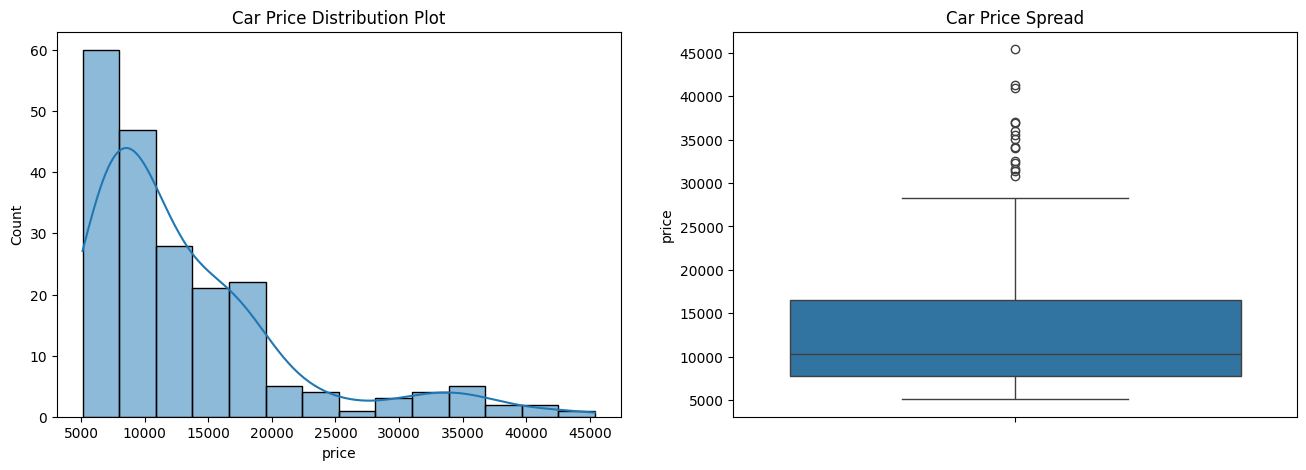

In [51]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(car_price_df.price, kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(car_price_df.price)

plt.show()

In [52]:
print(car_price_df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


📊 Observations sur les statistiques :
- 🚨 Présence d'outliers dans les données
- 📈 Distribution asymétrique de l'histogramme
- ❌ Ne suit pas une loi normale



___
```Petite apparté```

Nous allons créer des données pour illustrer les différentes distributions.
Et comprendre l'importance de la normalité des données.

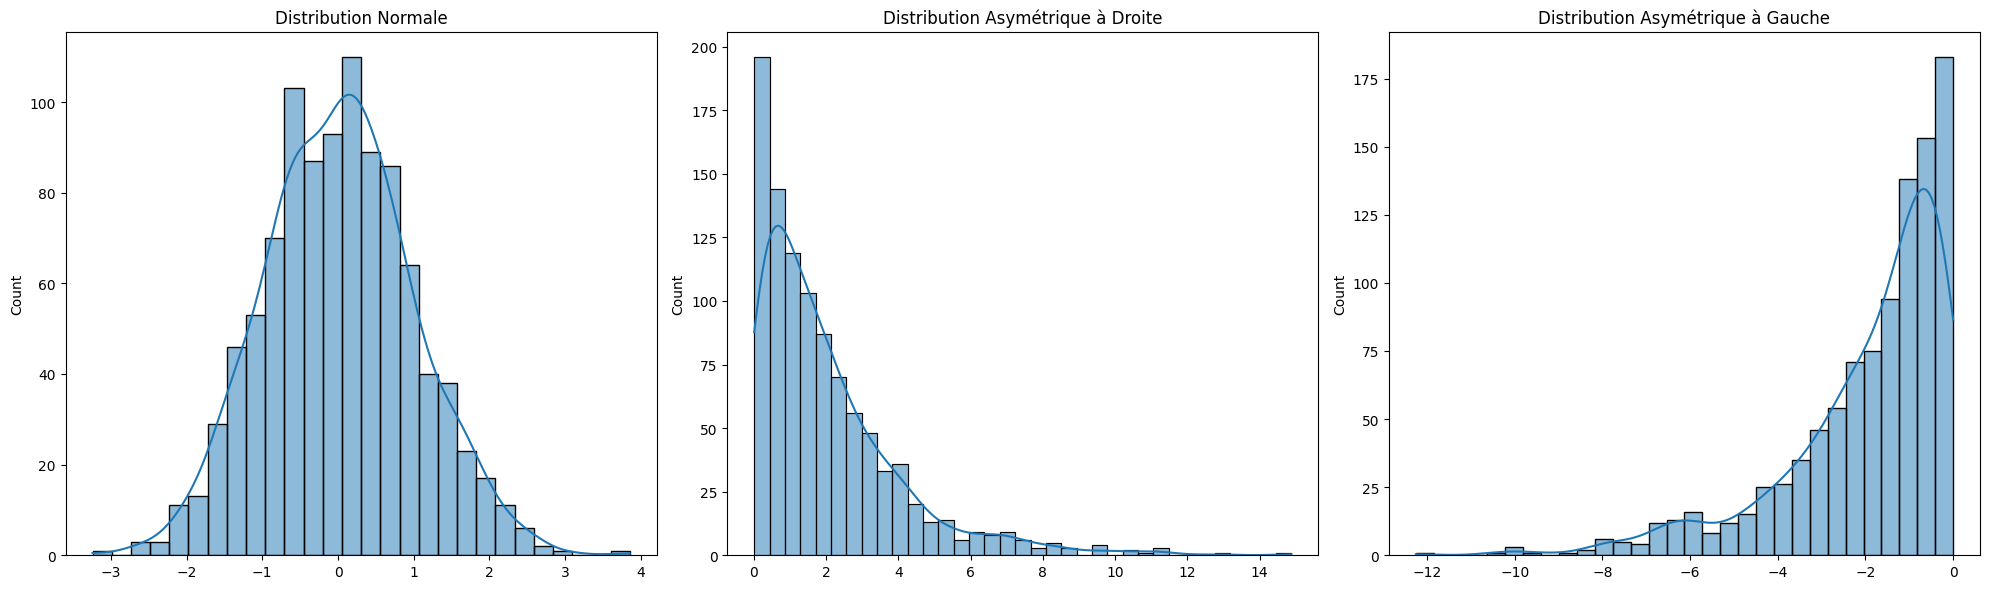

In [53]:
# Création de données pour illustrer les différentes distributions
np.random.seed(42)

plt.figure(figsize=(20,6))

# Distribution normale
plt.subplot(1,3,1)
normal_data = np.random.normal(0, 1, 1000)
plt.title('Distribution Normale')
sns.histplot(normal_data, kde=True)

# Distribution asymétrique à droite (skewed right)
plt.subplot(1,3,2)
skewed_right = np.random.exponential(2, 1000)
plt.title('Distribution Asymétrique à Droite')
sns.histplot(skewed_right, kde=True)

# Distribution asymétrique à gauche (skewed left)
plt.subplot(1,3,3)
skewed_left = -np.random.exponential(2, 1000)
plt.title('Distribution Asymétrique à Gauche')
sns.histplot(skewed_left, kde=True)

plt.tight_layout()
plt.show()


Dans les 3 graphiques précedent, nous pouvons voir que la distribution une suit une loi normale, alors que les deux autres ne la suivent pas.

Il est important de comprendre que la normalité des données est essentielle pour de nombreux algorithmes de machine learning.
En effet, de nombreux algorithmes supposent que les données sont distribuées normalement.

Si les données ne sont pas normalement distribuées, cela peut affecter les performances du modèle et la qualité des résultats.

Nous allons juste partir de ce postulat, mais si le sujet vous interesse vous pouvez vous rendre sur ce lien pour comprendre l'importance de la normalité des données.

- [Une distribution Normale 🔍](https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070)

Il éxiste plusieurs méthodes pour normaliser les données.
- Box Cox
- Logarithme
- Racine carrée

Dans le cas d'une régression linéaire, la normalisation des données n'est pas obligatoire. Cependant la normalité des résidus (erreurs) est importante.
___


**Garder cela en tête 🧠**

Dans un box plot (ou diagramme à boîte), on peut évaluer visuellement si une variable **semble** être significative pour un modèle de classification ou de régression en observant la séparation entre les groupes ou les catégories de cette variable par rapport à la variable cible.

``` Une intuition visuelle est toujours un bon point de départ.```

#### 2.4.1 Analyse des variables catégorielles 📊
Nous allons chercher à voir si des variables sont significatives pour expliquer le prix des voitures.

Dans un premier temps nous allons analyser les variables catégorielles. 

```python
carprice_df.select_dtypes(include=['object']).columns
```

In [244]:
# Analyse des variables catégorielles
car_price_df.select_dtypes(include=['object']).columns


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CarBrand'],
      dtype='object')

Nous avons 11 variables catégorielles.

Nous allons commencer par analyser la variable ```CarBrand``` et ```fueltype``` et ```carbody```.



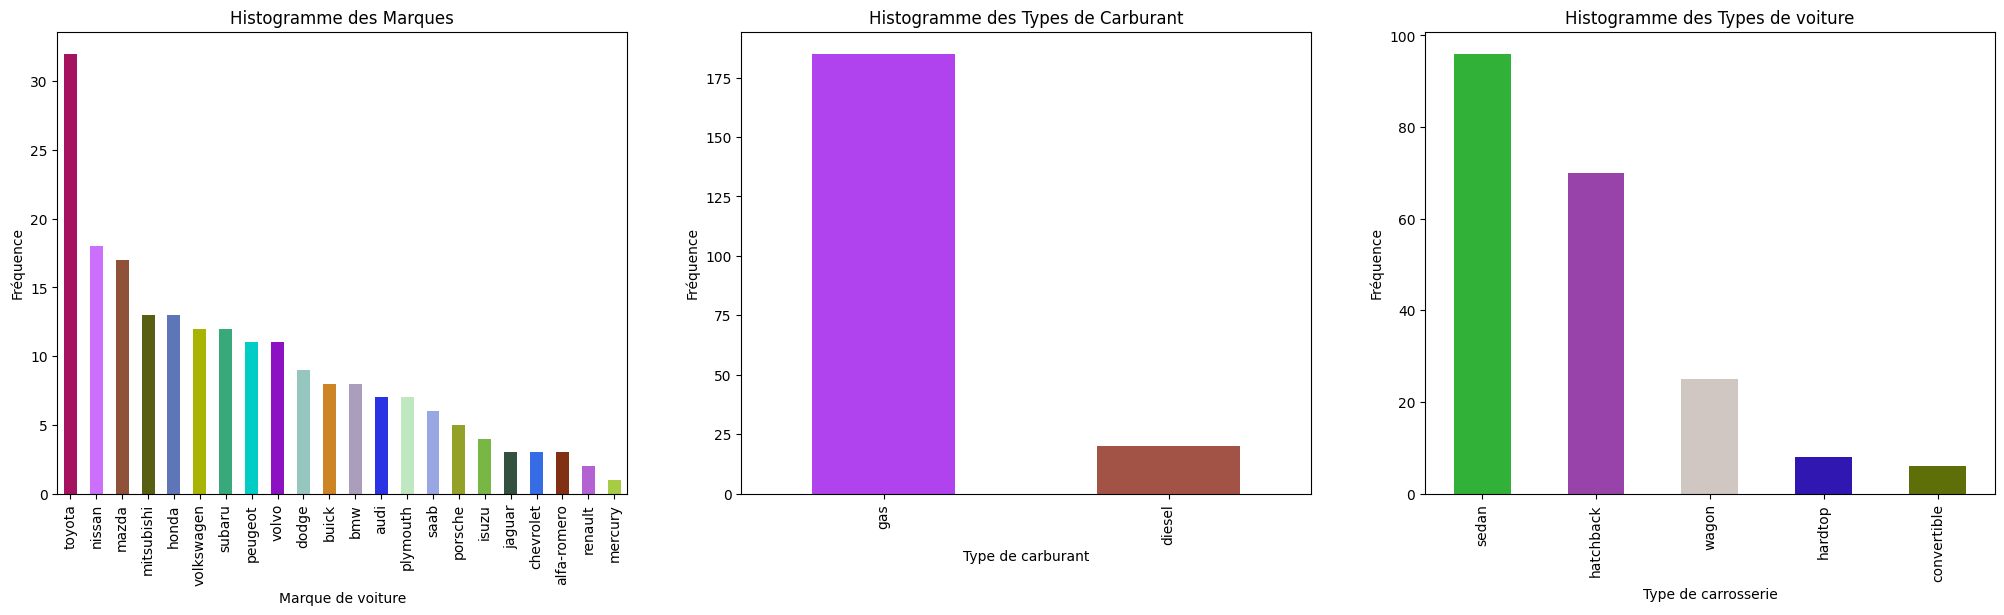

In [55]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = car_price_df.CarBrand.value_counts().plot(kind='bar', color=np.random.rand(len(car_price_df.CarBrand.unique()),3))
plt.title('Histogramme des Marques')
plt1.set(xlabel = 'Marque de voiture', ylabel='Fréquence')

plt.subplot(1,3,2)
plt1 = car_price_df.fueltype.value_counts().plot(kind='bar', color=np.random.rand(len(car_price_df.fueltype.unique()),3))
plt.title('Histogramme des Types de Carburant')
plt1.set(xlabel = 'Type de carburant', ylabel='Fréquence')

plt.subplot(1,3,3)
plt1 = car_price_df.carbody.value_counts().plot(kind='bar', color=np.random.rand(len(car_price_df.carbody.unique()),3))
plt.title('Histogramme des Types de voiture')
plt1.set(xlabel = 'Type de carrosserie', ylabel='Fréquence')

plt.show()

💡 Déduction : 
- Les marques de voiture les plus présentes sont ```nissan``` et ```toyota```. 🚗
- La plupart des voitures sont essence. ⛽️
- La plupart des voitures sont de type ```sedan```. (4 portes pour les passagers) 🚪



```Est ce que le prix des voitures est lié au type de carrosserie ? Ou encore à la marque de la voiture ? Ou alors au type de carburant ?```

Nous allons regarder les corrélations entre les variables catégorielles et le prix des voitures.

<Figure size 400x400 with 0 Axes>

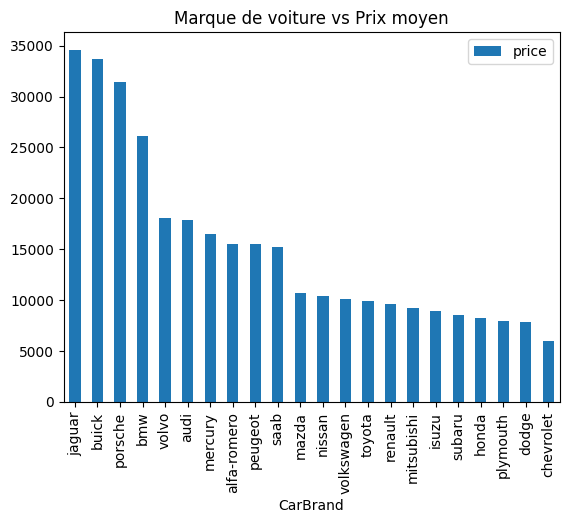

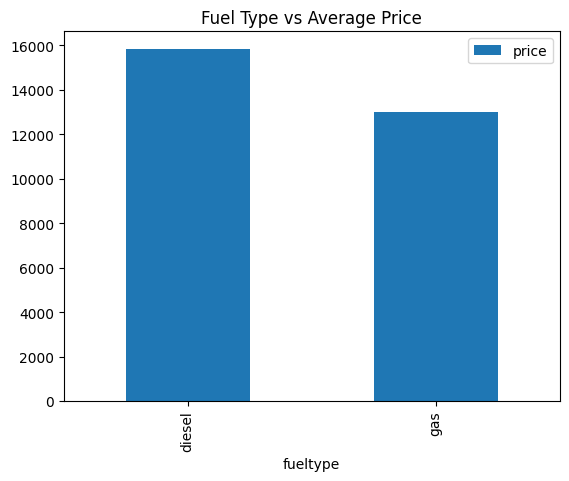

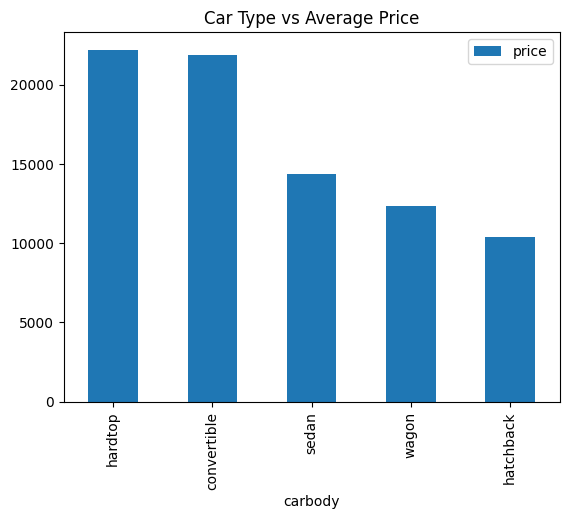

In [245]:
plt.figure(figsize=(4, 4))

df = pd.DataFrame(car_price_df.groupby(['CarBrand'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Marque de voiture vs Prix moyen')
plt.show()

df = pd.DataFrame(car_price_df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(car_price_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()



💡 Déduction : 
- On peut déja en déduire que les voitures de type ```hatchback``` et ```convertible``` sont plus chères que les voitures de type ```sedan```.

- Que les voitures diesel sont plus chères que les voitures essence.

- Que la marque ```jaguar``` est la plus chère.

```Et pour les autres variables catégorielles, nous allons faire un histogramme et un boxplot.```

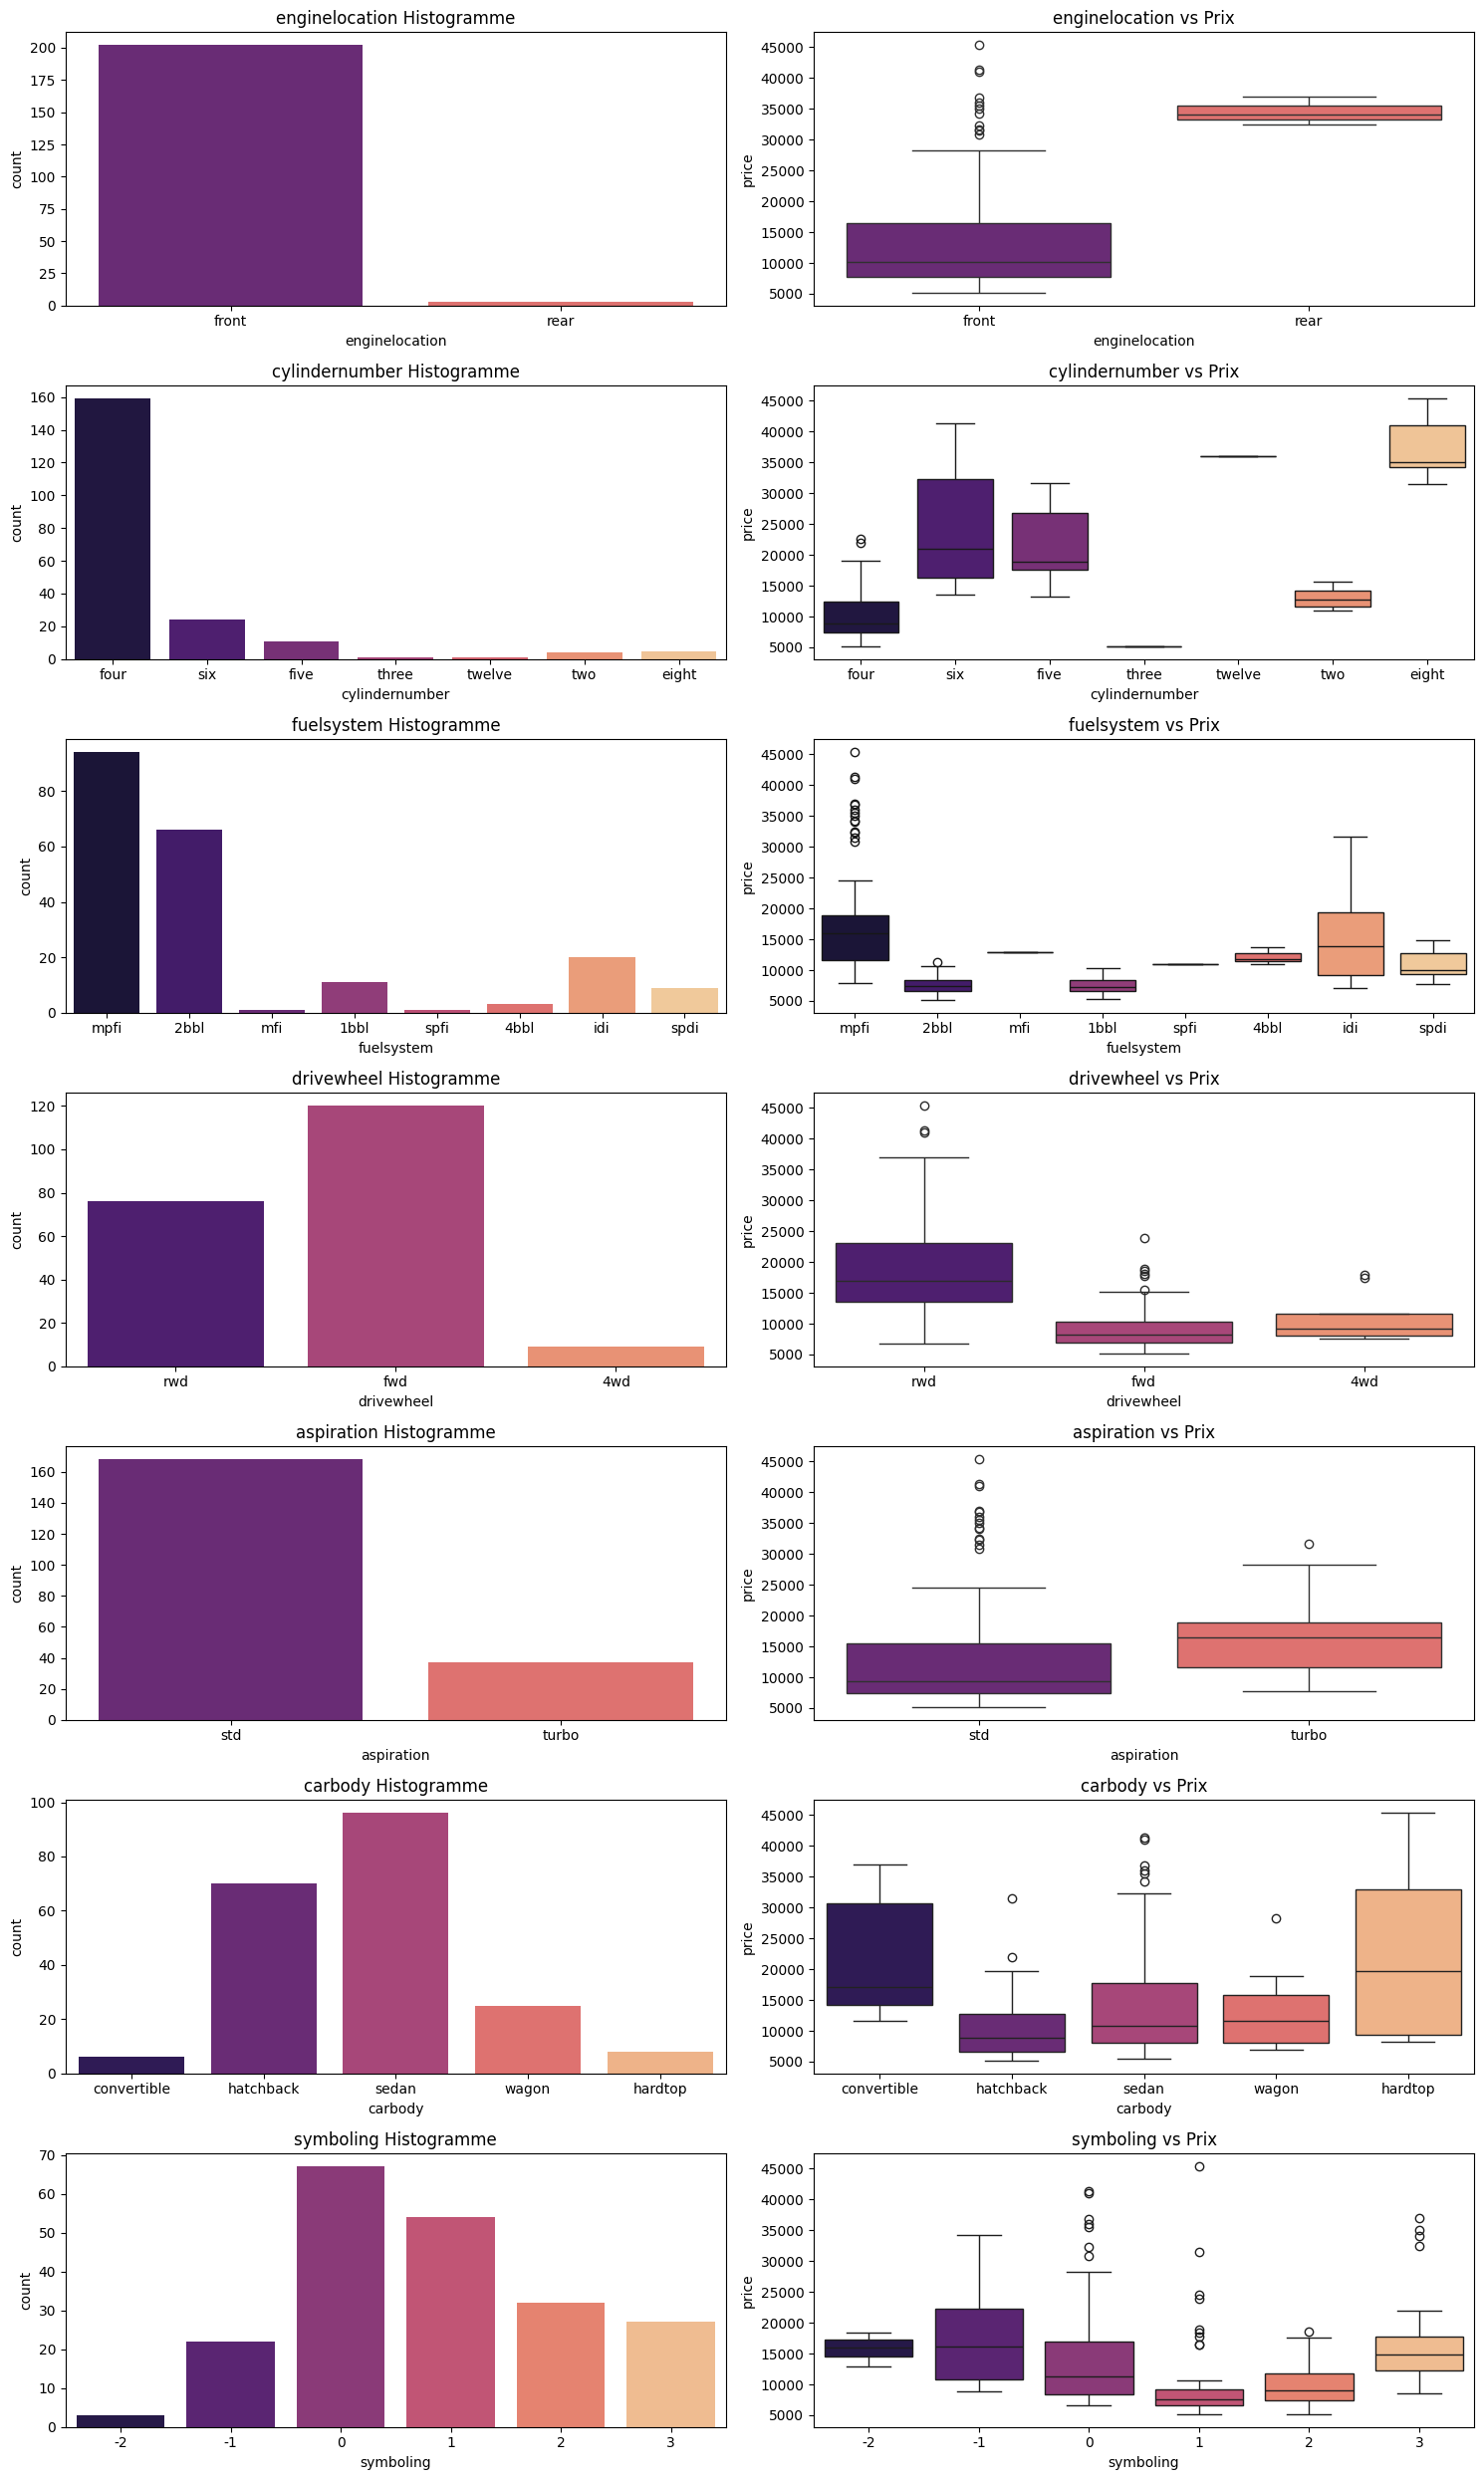

In [254]:
def plot_count(x, fig):
    # Utiliser les mêmes dimensions pour les deux subplots
    plt.subplot(7, 2, fig)
    plt.title(x + ' Histogramme')
    sns.countplot(x=car_price_df[x], palette="magma")

    plt.subplot(7, 2, fig + 1)
    plt.title(x + ' vs Prix')
    sns.boxplot(x=car_price_df[x], y=car_price_df.price, palette="magma")

plt.figure(figsize=(15, 25))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)
plot_count('aspiration', 9)
plot_count('carbody', 11)
plot_count('symboling', 13)
plt.tight_layout()



💡 Déduction :
- Très peu de points de données pour les catégories enginelocation pour en tirer une conclusion.
- Le nombre de cylindres le plus courant est quatre, six et cinq. Cependant, les huit cylindres ont la gamme de prix la plus élevée.
- mpfi et 2bbl sont les types de systèmes de carburant les plus courants. mpfi et idi ayant la gamme de prix la plus élevée. Mais il y a peu de données pour les autres catégories pour en tirer une conclusion significative.
- Une différence très significative dans la catégorie drivewheel. La plupart des voitures haut de gamme semblent préférer la transmission ```rwd```.
- Le turbo sur les voitures donne un prix moyen plus élevé.


Dans les différents graphiques que nous venons de voir. Nous pouvons déja avoir l'intuition que les variables ```fueltype```, ```cylindernumber```, ```drivewheel```, ```carbody```, ```aspiration``` peuvent être significatives pour expliquer le prix des voitures.

À ce stade, nous ne pouvons que faire des hypothèses.

Nous allons maintenant analyser les variables numériques.

#### 2.4.2 Analyse des variables numériques 📊



Un graphique que j'aime beaucoup est le ```pairplot```.

Il permet de visualiser les relations entre les variables numériques, et cela très rapidement.

Reprenons l'ensemble de mes variables numériques.

```python
car_price_df.select_dtypes(include=['float64', 'int64']).columns
```

In [66]:
# On va juste éxclure la variable ```car_ID``` qui ne nous intéresse pas ici.
car_price_df.drop('car_ID', axis=1).select_dtypes(include=['float64', 'int64']).columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

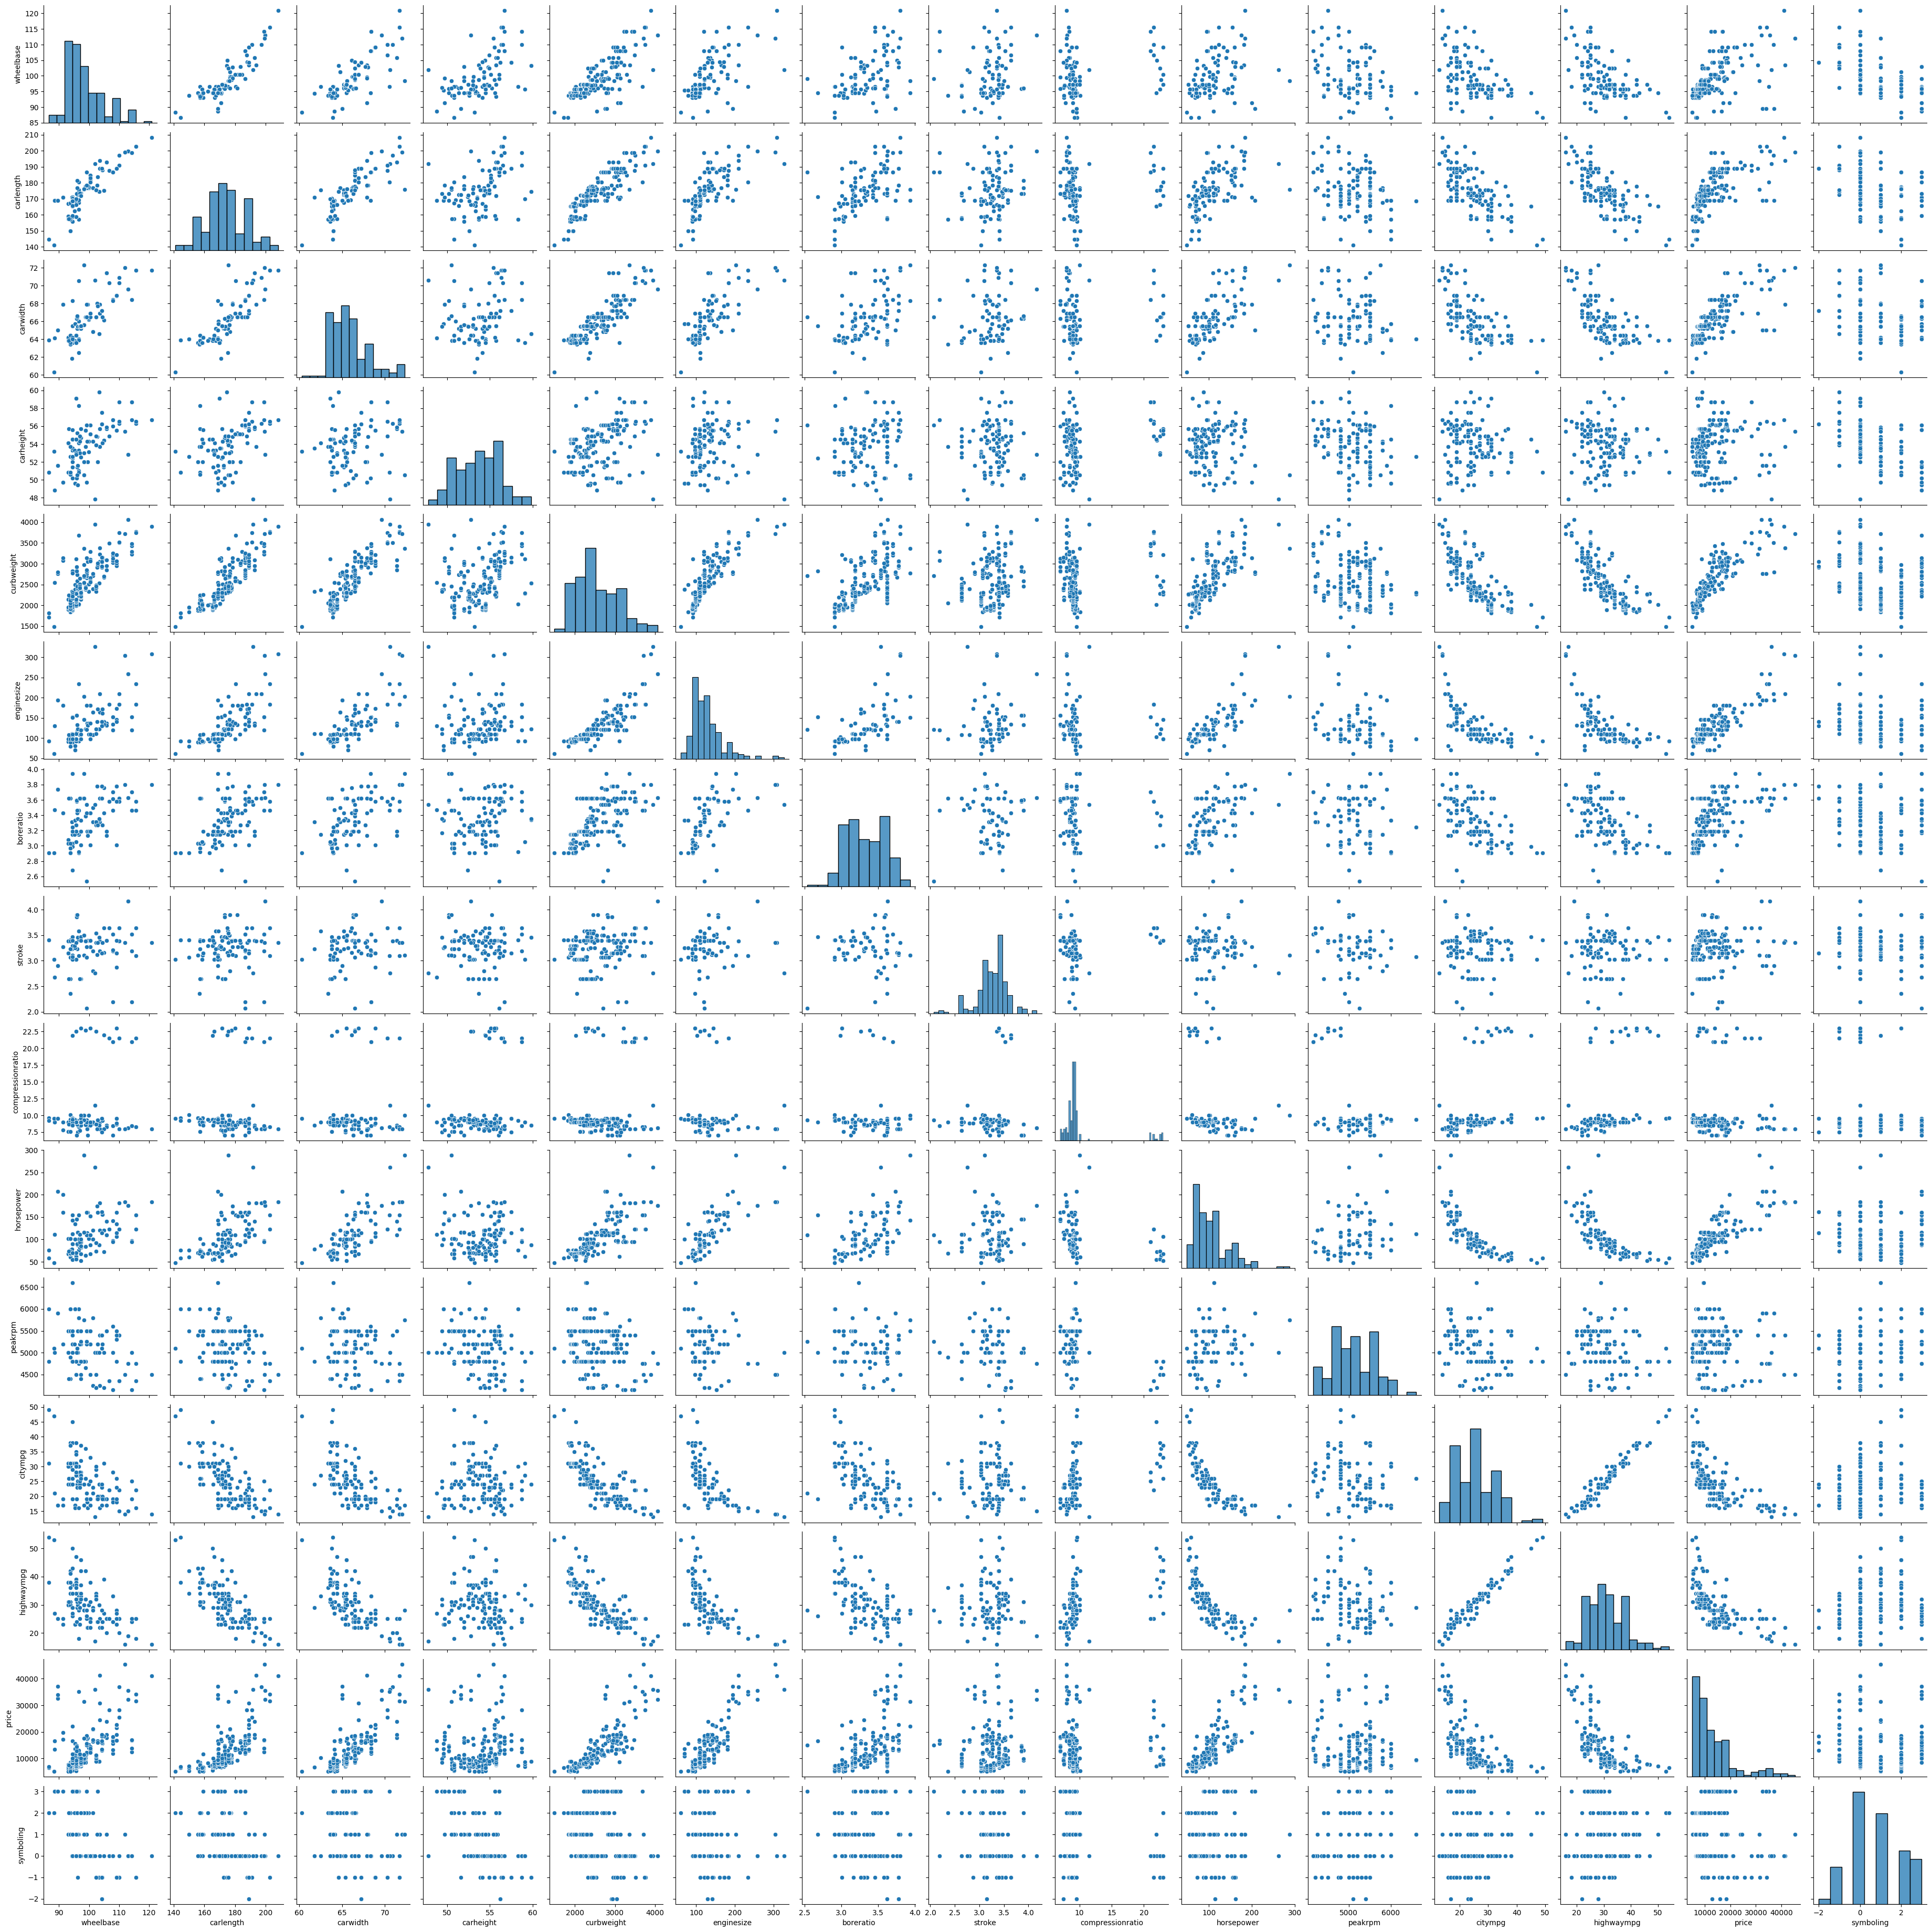

In [249]:

# On récupérer les variables numériques qui nous intéresse et par la suite on affiche un pairplot.
sns.pairplot(car_price_df[[ 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price','symboling']])
plt.show()


💡 Déduction :
- ```Enginesize```, ```curbweight```, ```carwidth```, ```carlength```, ```wheelbase```, ```boreratio```, ```horsepower``` semble posséder une relation linéaire et **positive** avec le prix des voitures.
- ```cityMpg``` et ```highwayMpg``` semblent posséder une relation linéaire et **négative** avec le prix des voitures.
  
#### 2.4.3 Construction de notre dataset Cible 📊

Maintenant que nous avons des intuitions sur nos variables, nous allons les combiner pour voir si nous pouvons en tirer des informations.

Pour rappel voici les variables catégorielles :

```fueltype```, ```cylindernumber```, ```drivewheel```, ```aspiration```, ```carbody```

Pour les variables numériques :

```wheelbase```, ```carlength```, ```carwidth```, ```curbweight```, ```enginesize```, ```boreratio```, ```horsepower```, ```citympg```, ```highwaympg```

Nous allons maintenant créer un dataset possédant uniquement ces variables.

```python
carprice_df_filtered = car_price_df[['fueltype','carbody', 'cylindernumber', 'drivewheel', 'aspiration', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']]
```


In [262]:
carprice_df_filtered = car_price_df[['fueltype','carbody', 'cylindernumber', 'drivewheel', 'aspiration', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']]
carprice_df_filtered

,fueltype,carbody,cylindernumber,drivewheel,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,convertible,four,rwd,std,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,gas,convertible,four,rwd,std,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,gas,hatchback,six,rwd,std,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,gas,sedan,four,fwd,std,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,gas,sedan,five,4wd,std,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,sedan,four,rwd,std,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0
201,gas,sedan,four,rwd,turbo,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0
202,gas,sedan,six,rwd,std,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0
203,diesel,sedan,six,rwd,turbo,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0


### 2.5 Un peu de data engineering 🧑‍💻


Pour construire un modèle de machine learning, il est primordial de préparer nos données.

Dans l'ordre :
- Encoder les variables catégorielles
- Normaliser les variables numériques


#### 2.5.1 Les variables catégorielles 🧑‍💻

Pour le premier points, nous allons utiliser la méthode suivante :

```python 
def dummy_transform(X, columns):
    df = X.copy()
    for col in columns:
        temp = pd.get_dummies(df[col], drop_first=True).astype(int)
        df = pd.concat([df, temp], axis=1)
        df.drop([col], axis=1, inplace=True)
    return df
```

La premire ligne :
 - ```df = X.copy()``` : On fait une copie de notre dataframe pour éviter les problèmes de side effect.
 - ```for col in columns:``` : On boucle sur les colonnes que l'on souhaite encoder.
 - ```temp = pd.get_dummies(df[col], drop_first=True).astype(int)``` : On encode la colonne en utilisant la méthode ```pd.get_dummies``` et on supprime la première colonne pour éviter le problème de colinéarité.
 - ```df = pd.concat([df, temp], axis=1)``` : On concatene notre dataframe avec la colonne encodée.
 - ```df.drop([col], axis=1, inplace=True)``` : On supprime la colonne d'origine pour ne garder que les colonnes encodées.
 - ```return df``` : On retourne le dataframe modifié.

Pour imager un peu ce code: 

<div style="text-align: center;">
<img src="./image/dummy.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Dummy Encoding</figcaption>
</div>




```Il est important de convertir les variables catégorielles en valeurs numériques pour plusieurs raisons, notamment parce que la plupart des algorithmes de machine learning ne peuvent pas traiter directement des données textuelles.```

In [266]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

carprice_df_filtered_copy = carprice_df_filtered.copy()
def dummy_transform(X, columns):
    df = X.copy()
    for col in columns:
        temp = pd.get_dummies(df[col], drop_first=True).astype(int)
        df = pd.concat([df, temp], axis=1)
        df.drop([col], axis=1, inplace=True)
    return df

# Définition des colonnes catégorielles
categorical_columns = ['fueltype', 'cylindernumber', 'drivewheel', 'aspiration','carbody']

# Création de la pipeline avec une fonction au lieu d'une classe
preprocessing_pipeline = Pipeline([
    ('dummy_encoding', FunctionTransformer(func=lambda x: dummy_transform(x, categorical_columns)))
])

# Application de la pipeline
carprice_df_filtered_copy = preprocessing_pipeline.fit_transform(carprice_df_filtered_copy)
carprice_df_filtered_copy


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,three,twelve,two,fwd,rwd,turbo,hardtop,hatchback,sedan,wagon
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,1,0,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,1,0,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,1,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,1,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0,...,0,0,0,0,1,0,0,0,1,0
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0,...,0,0,0,0,1,1,0,0,1,0
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0,...,0,0,0,0,1,0,0,0,1,0
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0,...,0,0,0,0,1,1,0,0,1,0


#### 2.5.2 Les variables numériques 🧑‍💻

 Il est important de normaliser (scaler) nos variables numériques pour plusieurs raisons :


 1. ```Équité entre les variables``` : Sans normalisation, les variables avec de grandes valeurs pourraient avoir plus d'influence que celles avec de petites valeurs

 2. Performance des modèles : Certains algorithmes comme la régression logistique ou les réseaux de neurones sont très sensibles à l'échelle des variables

 3. Distance et similarité : Les mesures de distance utilisées dans certains algorithmes (comme k-means) sont plus pertinentes avec des données normalisées

 4. Stabilité numérique : La normalisation aide à éviter les problèmes de calcul liés aux différences d'échelle importantes





Le but des scaling est de ramener les valeurs entre 0 et 1.

Il éxiste plusieurs types de scaling :
- MinMaxScaler : $$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$
- StandardScaler : $$x_{scaled} = \frac{x - \mu}{\sigma}$$
- RobustScaler : $$x_{scaled} = \frac{x - Q1}{Q3 - Q1}$$


```Choix du Scaler pour vos Données ! 😊```

Voici un guide simple pour choisir entre le **RobustScaler**, **StandardScaler**, et **MinMaxScaler** en fonction de vos données et de votre modèle !

### 🎯 **Quand utiliser le MinMaxScaler :**
- ✅ **Données sans valeurs aberrantes** (ou très peu) 🌟
- ✅ Besoin de **valeurs strictement entre 0 et 1** ou entre -1 et 1 (utile pour les réseaux de neurones) 🌈
- ✅ Utile pour les **modèles sensibles aux distances** comme les réseaux de neurones, k-NN, ou les SVM

**Exemple :** Si vos données sont bien réparties et sans outliers, comme des scores ou des pourcentages, le MinMaxScaler est un bon choix !

---

### 🎯 **Quand utiliser le StandardScaler :**
- ✅ Lorsque les données suivent une **distribution normale** (ou presque) 📈
- ✅ Lorsque vous avez besoin que les données soient **centrées autour de 0 avec une variance de 1** (pour des modèles linéaires) 🔄
- ✅ Idéal pour les modèles de régression linéaire, les analyses PCA, ou les algorithmes basés sur des hypothèses de normalité

**Exemple :** Pour des données comme la taille, le poids, ou toute mesure qui se rapproche d’une courbe en cloche, le StandardScaler est parfait !

---

### 🎯 **Quand utiliser le RobustScaler :**
- ✅ **Données avec des valeurs aberrantes (outliers)** 🚨
- ✅ Vous souhaitez que les **outliers aient moins d’influence** sur la mise à l’échelle ⚖️
- ✅ Adapté aux données asymétriques et non normales

**Exemple :** Pour des variables comme le prix ou le revenu, où les valeurs peuvent varier énormément, le RobustScaler est souvent le meilleur choix !

---

### En résumé :
- 🥇 **MinMaxScaler** pour des données homogènes et sans outliers.
- 🥈 **StandardScaler** pour des données proches d'une distribution normale.
- 🥉 **RobustScaler** pour des données avec des valeurs aberrantes ou très dispersées.

Utilisez ces scalers en fonction de la **nature de vos données** pour de meilleurs résultats ! 🚀

In [208]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(carprice_df_filtered, train_size = 0.7, test_size = 0.3, random_state = 100)

In [195]:
df_train.shape, df_test.shape


((143, 20), (62, 20))

Pour ce scaling nous allons utiliser la méthode minmaxscaler.

La formule du minmaxscaler est la suivante : 

$$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Ce qu'elle fait est de ramener les valeurs entre 0 et 1, avec l'aide de deux paramètres :
- ```x_min``` : La valeur minimale de la colonne
- ```x_max``` : La valeur maximale de la colonne


Pourquoi appliquer ce scaling seulement sur le df_train ? 

```Il nous faut éviter le data leak.```

Je ne dois pas donner à mon modèle des informations sur le df_test, car ce dernier me servira à valider les performances de mon modèle.

Un petit éxemple de ce que fait le scaler.

Prenons le cas de la variable ```curbweight```.

In [196]:
print(f"le max de notre distribution sur curbweight est : {carprice_df_filtered[["curbweight"]].max()}")
print(f"le min de notre distribution sur curbweight est : {carprice_df_filtered[["curbweight"]].min()}")


le max de notre distribution sur curbweight est : curbweight    4066
dtype: int64
le min de notre distribution sur curbweight est : curbweight    1488
dtype: int64


Dans cet exemple, le max est 4063 et le min est 1488.

Le calcul du minmaxscaler va consister à ramener toutes les valeurs de la colonne ```curbweight``` entre 0 et 1.

$$x_{scaled} = \frac{x - 1488}{4066 - 1488}$$

La variable x étant une valeur de la colonne ```curbweight```.

___
```apparté```

#### Bonnes pratiques pour éviter un data leak 🛡️

1. 🔄 **Diviser le dataset en ensembles d'entraînement et de test AVANT toute transformation de scaling ou de calcul sur une distribution** : Toujours séparer les données dès le départ pour éviter que les informations de l'ensemble de test ne soient utilisées par inadvertance.

2. 📏 **Appliquer les transformations sur l'ensemble d'entraînement uniquement (fit)** : Ajuster les scalers et autres transformations statistiques uniquement sur l'ensemble d'entraînement pour que les valeurs calculées ne soient basées que sur cet ensemble.

3. 🎯 **Utiliser les statistiques de l'entraînement pour transformer le test (transform)** : Appliquer les transformations sur l'ensemble de test en utilisant les statistiques calculées sur l'ensemble d'entraînement, sans recalculer de nouvelles valeurs.

4. 🧪 **Ne pas inclure les caractéristiques liées à la cible** : S'assurer que les caractéristiques ajoutées dans le modèle ne contiennent pas d'informations futures ou directement dérivées de la variable cible (comme l'ID client ou la date d'achat).

5. 🚫 **Éviter de "fitter" sur tout le dataset lors de l’entraînement** : Pour les pipelines ou les transformations, utiliser les données d’entraînement séparément et ne jamais "fitter" sur l'ensemble complet.

6.  🔐 **Utiliser des échantillons indépendants lors de la validation finale** : Lors de la validation finale, vérifier les performances sur un jeu de données entièrement nouveau pour s'assurer de la robustesse du modèle.


En suivant ces bonnes pratiques, tu minimises le risque de fuite de données et garantis des évaluations de modèle plus fiables et plus réalistes ! 💪

---



J'applique maintenant le scaling sur le df_train avec le code suivant :
``` python 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','highwaympg','citympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
```

Voila ce que je fais dans le code précedent: 
- Je crée un scaler de type MinMaxScaler
- Je selectionne les colonnes numériques que je souhaite scaler
- Je fit le scaler sur le df_train
- Je transforme le df_train avec le scaler

```Le fit va me permettre de calculer les paramètres de scaling (x_min et x_max) et les appliquer à la transformation.```

```Le transform va me permettre d'appliquer les paramètres de scaling aux colonnes selectionnées.```


In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','highwaympg','citympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [198]:
df_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,gas,five,four,six,three,twelve,two,fwd,rwd,turbo
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.500000,0.567568,0.068818,1,0,1,0,0,0,0,1,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.166667,0.270270,0.466890,1,0,1,0,0,0,0,0,1,0
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.361111,0.324324,0.122110,1,0,1,0,0,0,0,0,1,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.222222,0.270270,0.314446,1,0,1,0,0,0,0,0,1,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.111111,0.135135,0.382131,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.334483,0.508943,0.425000,0.354926,0.184906,0.388889,0.283333,0.277778,0.351351,0.114954,1,0,1,0,0,0,0,1,0,1
103,0.475862,0.707317,0.516667,0.609775,0.452830,0.595238,0.433333,0.166667,0.216216,0.231539,1,0,0,1,0,0,0,1,0,0
67,0.806897,0.809756,0.833333,0.786268,0.460377,0.714286,0.312500,0.250000,0.216216,0.564522,0,1,0,0,0,0,0,0,1,1
24,0.244828,0.263415,0.291667,0.185803,0.109434,0.230159,0.083333,0.500000,0.567568,0.030693,1,0,1,0,0,0,0,1,0,0


🎉 Bien joué 🎉 

On a déja fait beaucoup de chose: 
- On a analysé les données
- On a préparé nos données pour le modèle
- On a encodé nos variables catégorielles
- On a fait du scaling sur nos variables numériques

Il y a une dérnière intuition à avoir ici. Est ce que les variables que nous avons selectionnés sont significatives pour expliquer le prix des voitures ?
Et si oui n'y a t'il pas d'autocorrélation entre les variables ?

Des variables fortement corrélées entre elles peuvent poser des problèmes lors de l'entraînement de notre modèle.
Imaginons que nous ayons deux variables ```poids_voiture``` et ```poids_voiture_sans_essence```.

L’autocorrélation entre les variables (ou multicolinéarité) peut poser des problèmes lors de l’entraînement du modèle. Par exemple, imaginons que nous ayons deux variables fortement corrélées : poids_voiture (le poids total de la voiture) et poids_voiture_sans_essence (le poids de la voiture sans le carburant).

Si nous incluons ces deux variables dans notre modèle, celui-ci pourrait interpréter qu’elles apportent une information similaire, rendant difficile pour le modèle de déterminer quelle variable est la plus importante à pondérer. Cela peut mener à un modèle instable, des coefficients moins interprétables, voire une réduction de la performance globale.


#### 2.5.3 Suppression des variables 🧮

Dans cette partie nous allons effectuer plusieurs choses:

1. Regarder la matrice de corrélation afin de determiner visuellement les variables fortement corrélées entre elles.
   
2. Utiliser l'indicateur VIF pour déterminer les variables avec un fort taux de multicolinéarité.
   
3. Utiliser la méthode RFE pour déterminer les variables les plus importantes.
   
   

```Matrice de corrélation```

La matrice de corrélation nous permettra de voir les corrélations entre nos variables.

Si deux variables ont une corrélation de 1 ou -1, cela signifie qu'elles sont parfaitement corrélées.

Si deux variables ont une corrélation de 0, cela signifie qu'elles ne sont pas corrélées.

Pour ce faire nous allons utiliser le code python suivant : 

```python 
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
````

**df_train.corr()** nous permet de récupérer la matrice de corrélation.

La fonction ```sns.heatmap``` va nous permettre d'afficher cette matrice de manière visuelle.



<Axes: >

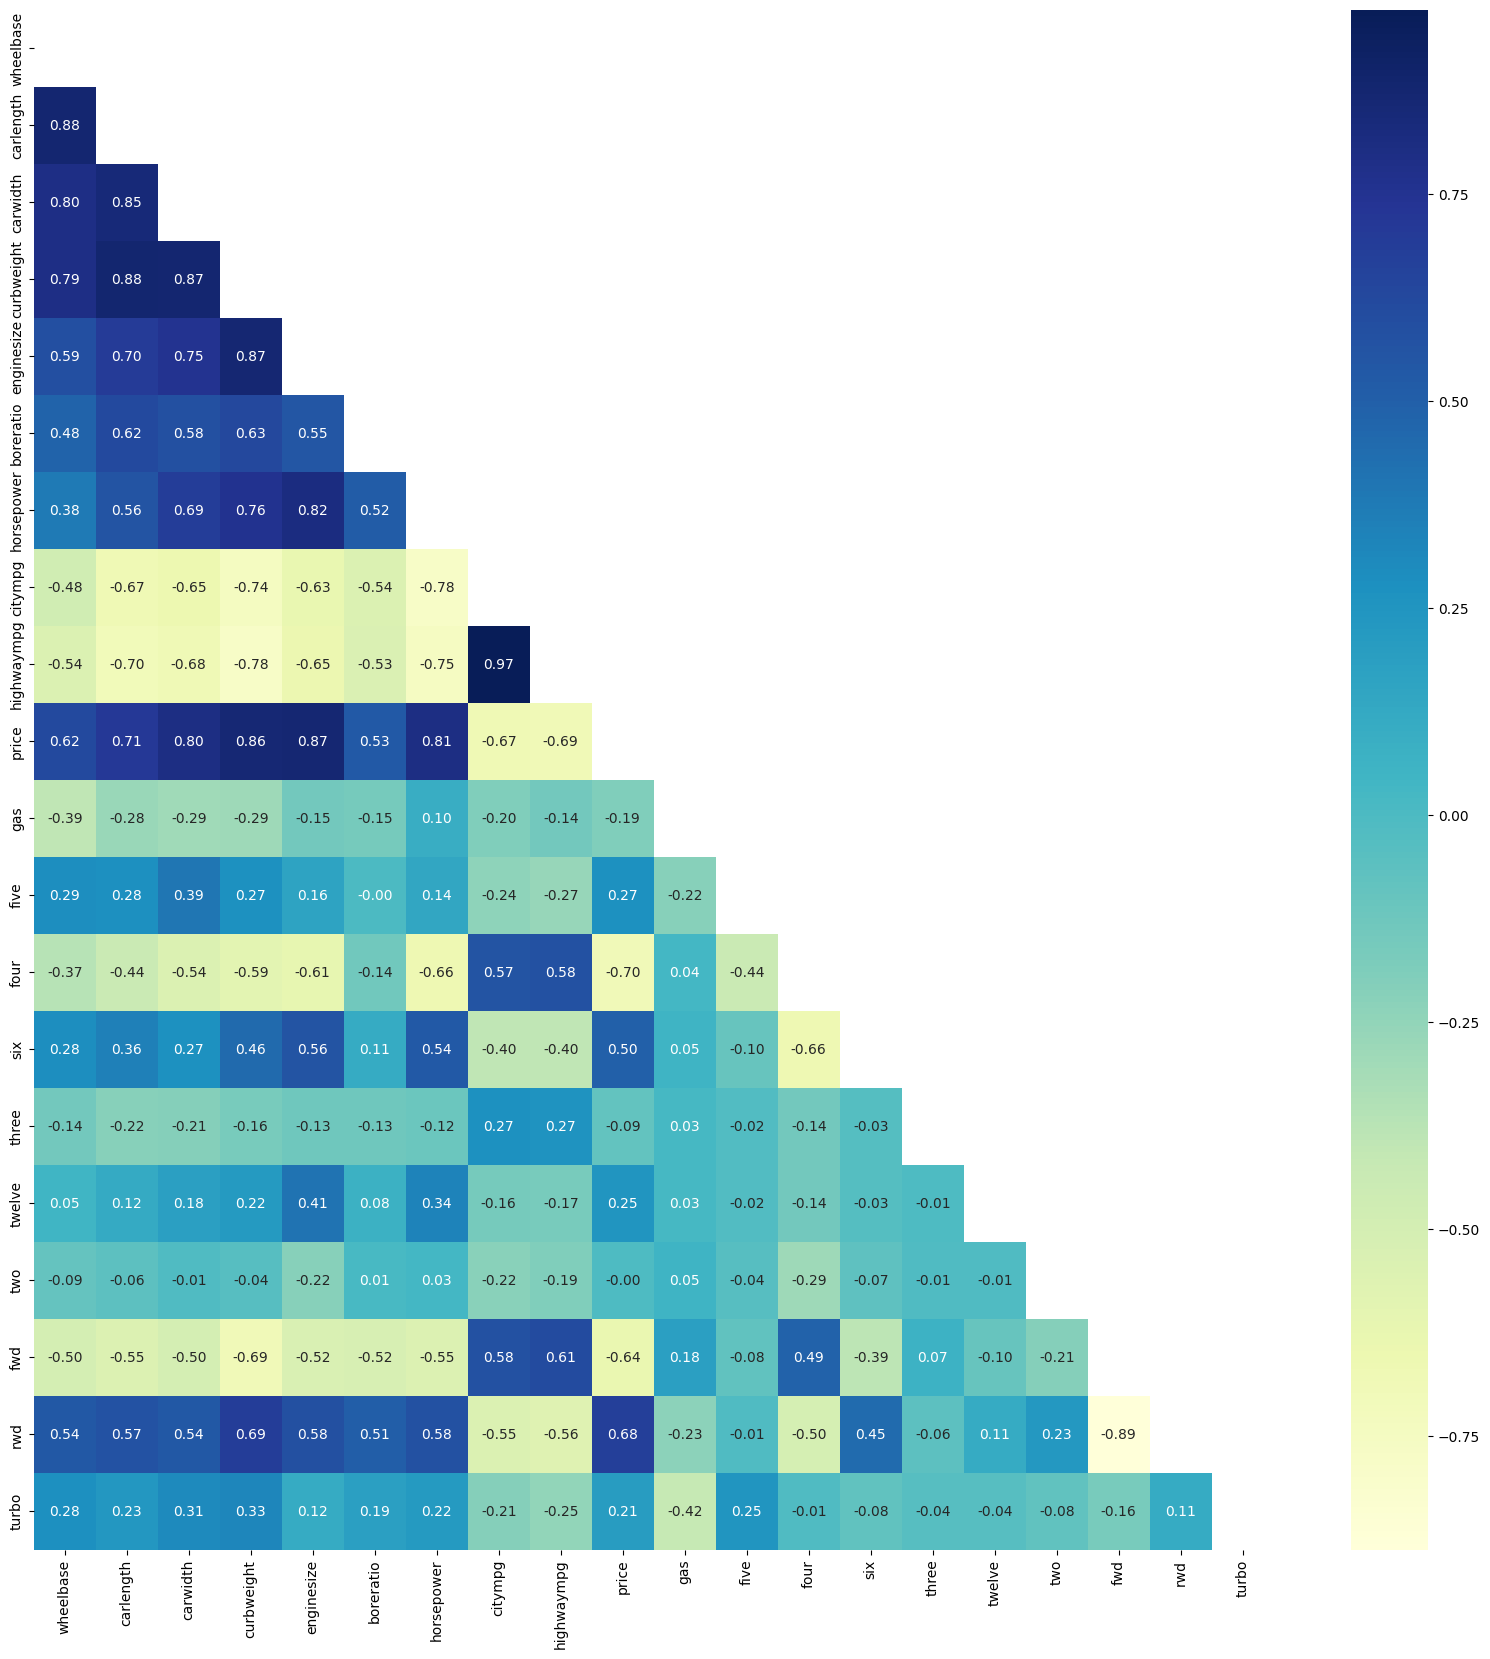

In [221]:
   # Suggestion d'ajout de paramètres pour plus de clarté
plt.figure(figsize=(20, 20))
sns.heatmap(df_train.corr(),
            annot=True,
            cmap="YlGnBu",
            fmt='.2f',  # Format des nombres
            mask=np.triu(np.ones_like(df_train.corr())))  # Masque triangulaire

On peut le voir avec l'images suivante: 

<div style="text-align: center;">
<img src="./image/highcorr.png" width="1000" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Matrice de corrélation</figcaption>
</div>

Nous avons des variables fortement corrélées avec notre target ```price```.

Surtout les variables  ```curbweight```, ```enginesize```, ```carwidth```et ```horsepower```.

On peut aussi en déduire qu'une voiture avec 4 cylindres a un prix plus faible qu'une voiture avec 8 cylindres par éxemple. 



___
```apparté```

**Une régression linéaire c'est quoi ?**

C'est une formule qui ressemble à cela:

$$y = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + ... + \beta_n * x_n$$

L'ensemble des **x** correspondent à nos variables explicatives et le **y** à notre variable cible.

Le but de notre regression linéaire va être de trouver les coefficients $\beta_0$, $\beta_1$, $\beta_2$, ... , $\beta_n$ qui permettront de minimiser l'erreur entre notre prédiction et la réalité.

Regarder l'image suivante : 

<div style="text-align: center;">
<img src="./image/reggif.gif" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Regression linéaire</figcaption>
</div>

C'est une régression linéaire en 2 dimensions X et y. 

Sa formule sera la suivante : 

$$y = \beta_0 + \beta_1 * x$$

La régression linéaire va essayer de minimiser l’erreur entre les prédictions et les valeurs réelles, en cherchant les coefficients  $\beta_0$ ,  $\beta_1$ ,  $\beta_2$ , …,  $\beta_n$  en minimisant la somme des carrés des erreurs. 
Dans le cas de modèles plus complexes ou de grands ensembles de données, une méthode de descente de gradient est souvent utilisée pour trouver ces coefficients de manière efficace.

Si les maths vous intéressent n'hésitez pas à regarder [ce cours de régression linéaire](https://chandhana520.medium.com/implementing-sgd-stochastic-gradient-descent-for-linear-regression-1a82cddbb36b)
___


```Utilisation de RFE```

La méthode RFE (Recursive Feature Elimination) est une technique de sélection de caractéristiques qui consiste à :

1.	Entraîner un modèle sur toutes les variables explicatives.

2.	Évaluer l’importance de chaque variable (par exemple, en fonction des coefficients pour une régression linéaire ou de l’importance des features pour un arbre de décision).

3.	Éliminer la variable la moins importante.

4.	Répéter ce processus jusqu’à obtenir le nombre de caractéristiques souhaité.

Le but de RFE est de conserver les variables les plus pertinentes pour le modèle, réduisant ainsi la complexité et améliorant la performance générale.

#### [Documentation de la rfe](https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.RFE.html)


Il nous faut lancer notre modèle de régression linéaire plusieurs fois et en fonction du résultat de la méthode RFE, nous allons éliminer les variables les moins importantes.

Dans un premier temps séparons notre target de nos variables explicatives.

```python
y_train = df_train.pop('price')
X_train = df_train
```
```pop``` permet de supprimer la colonne de df_train et de la stocker dans y_train.

In [205]:
y_train = df_train['price']
X_train = df_train.drop(columns=['price'])


In [200]:
# J'importe le modèle de régression linéaire
from sklearn.linear_model import LinearRegression
# J'importe la méthode RFE
from sklearn.feature_selection import RFE
# J'instancie le modèle de régression linéaire
lm = LinearRegression()
# Je donne à la méthode RFE le modèle de régression linéaire que je souhaite entraîner et le nombre de variables que je souhaite conserver.
rfe = RFE(estimator=lm, n_features_to_select=10)
# Je fit la méthode RFE sur mes variables explicatives et mon target.
rfe = rfe.fit(X_train, y_train)

In [201]:
[(col, bool(support), int(rank)) for col, support, rank in zip(X_train.columns, rfe.support_, rfe.ranking_)]

[('wheelbase', True, 1),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('horsepower', True, 1),
 ('citympg', False, 2),
 ('highwaympg', True, 1),
 ('gas', False, 9),
 ('five', False, 8),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 10),
 ('twelve', True, 1),
 ('two', False, 5),
 ('fwd', False, 3),
 ('rwd', True, 1),
 ('turbo', False, 7)]

In [168]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'highwaympg', 'four', 'six', 'twelve', 'rwd'],
      dtype='object')

Nous avons la liste des features retenues par la méthode RFE.

Utilisons les pour la suite de notre analyse.
``` python
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()
```


In [169]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,carwidth,curbweight,enginesize,horsepower,highwaympg,four,six,twelve,rwd
122,0.244828,0.291667,0.272692,0.139623,0.083333,0.567568,1,0,0,0
125,0.272414,0.666667,0.500388,0.339623,0.395833,0.270270,1,0,0,1
166,0.272414,0.308333,0.314973,0.139623,0.266667,0.324324,1,0,0,1
1,0.068966,0.316667,0.411171,0.260377,0.262500,0.270270,1,0,0,1
199,0.610345,0.575000,0.647401,0.260377,0.475000,0.135135,1,0,0,1


```Indicateur VIF```

Un indicateur très important dans l'analyse de la colinéarité est le VIF (Variance Inflation Factor).

Ce dernier va nous permettre de déterminer les variables qui sont fortement corrélées entre elles.

Si le VIF d'une variable est supérieur à **5**, cela signifie que la variable est fortement corrélée avec les autres variables et est susceptible d'être redondante.

Pour plus d'informations sur le VIF, consultez [cette explication détaillée](https://www.investopedia.com/terms/v/variance-inflation-factor.asp)

 La formule du VIF pour une variable $X_j$ est :

 $VIF_j = \frac{1}{1-R^2_j}$

 où $R^2_j$ est le coefficient de détermination obtenu en régressant $X_j$ sur toutes les autres variables explicatives.

 Si tu as un DataFrame avec les colonnes X1, X2, …, X_x, alors le calcul du VIF consistera en :

  •	Régression de X1 sur X2, X3, …, calcul de  ${R^2_1}$ , puis calcul du VIF pour X1.

  •	Régression de X2 sur X1, X3, …, calcul de  ${R^2_2}$ , puis calcul du VIF pour X2.

  •	Et ainsi de suite, jusqu’à X_x.




In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df):
    # Ajouter une constante (intercept) pour le calcul du VIF
    X = add_constant(df)
    # Calcul du VIF pour chaque variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Supprimer la constante des résultats pour ne garder que les variables du DataFrame d'origine
    vif_data = vif_data[vif_data["Variable"] != "const"]

    return vif_data

# Exemple d'utilisation
vif_df = calculate_vif(X_train_rfe)
print(vif_df)


      Variable        VIF
1    wheelbase   5.699913
2     carwidth   7.914499
3   curbweight  14.425959
4   enginesize   8.805848
5   horsepower   6.533482
6   highwaympg   3.509583
7         four   2.745309
8          six   3.288213
9       twelve   1.712302
10         rwd   2.129914


A partir de ce résultat on peut en déduire que les variables ```curbweight```, ```enginesize```, ```carwidth```et ```horsepower``` sont fortement corrélées.

On peut donc en déduire qu'il est préférable de ne garder qu'une de ces variables dans notre modèle.

Pour l'instant, supprimons seulement ```curbweight``` de X_train_rfe.

```python
X_train_rfe = X_train_rfe.drop(columns=['curbweight'])
X_train_rfe.head()
```

In [173]:
X_train_rfe = X_train_rfe.drop(columns=['curbweight'])
X_train_rfe.head()

,wheelbase,carwidth,enginesize,horsepower,highwaympg,four,six,twelve,rwd
122,0.244828,0.291667,0.139623,0.083333,0.567568,1,0,0,0
125,0.272414,0.666667,0.339623,0.395833,0.270270,1,0,0,1
166,0.272414,0.308333,0.139623,0.266667,0.324324,1,0,0,1
1,0.068966,0.316667,0.260377,0.262500,0.270270,1,0,0,1
199,0.610345,0.575000,0.260377,0.475000,0.135135,1,0,0,1


Calculons le VIF de nouveau.

In [174]:
vif_df = calculate_vif(X_train_rfe)
print(vif_df)

     Variable       VIF
1   wheelbase  4.692157
2    carwidth  7.654015
3  enginesize  6.185250
4  horsepower  6.491564
5  highwaympg  2.950984
6        four  2.745222
7         six  3.242419
8      twelve  1.657299
9         rwd  1.943002


Nous avons encore carwidth qui a un VIF supérieur à 5 ainsi que horsepower et enginesize.

Pour l'instant gardons notre dataset tel quel.


### Régression linéaire et data ingénierie 📈

Dans cette partie nous allons utiliser statsmodel pour faire de la régression linéaire.

Il va nous permettre de voir les coefficients de notre modèle et de voir si les variables que nous avons selectionnés sont significatives.

```python
def construire_modele(X, y):
    X = sm.add_constant(X)  # Ajout de la constante (intercept)
    lm = sm.OLS(y, X).fit()  # Ajustement du modèle de régression linéaire
    print(lm.summary())  # Affichage du résumé du modèle
    return X  # Retourne X avec la constante ajoutée
```


In [183]:
import statsmodels.api as sm
def construire_modele_regression(X, y):
    X = sm.add_constant(X)  # Ajout de la constante (intercept)
    lm = sm.OLS(y, X).fit()  # Ajustement du modèle de régression linéaire
    print(lm.summary())  # Affichage du résumé du modèle
      # Retourne X avec la constante ajoutée

construire_modele_regression(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     93.21
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           5.05e-53
Time:                        18:22:48   Log-Likelihood:                 159.16
No. Observations:                 143   AIC:                            -298.3
Df Residuals:                     133   BIC:                            -268.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0362      0.052     -0.689      0.4

Beaucoup d'informations... 😅

Pour ce cours, nous analyserons seulement le ${R^2}$ et les p-values.

Le ${R^2}$ représente la qualité de notre modèle. Plus il est proche de 1, plus notre modèle est performant.

Les p-values représentent la significativité de chaque variable. Si la p-value est inférieur à 0.05, la variable est significative.

<div style="text-align: center;">
<img src="./image/ols.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>R2</figcaption>
</div>

<div style="position: absolute; bottom: 20px; right: 20px; background-color: #e6f3ff; padding: 10px; border-radius: 5px; border: 1px solid #ccc; height: 50px; width: 260px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); overflow-y: auto;">
     <p style="margin: 0;"><strong>Note:</strong> Copiez-collez les résultats de la régression dans chatgpt afin de l'analyser.</p>
     
 </div>

```Qualité du modèle```
- R-squared (R²) : La valeur de  R^2  est de 0.863, ce qui signifie que 86,3 % de la variance de la variable cible (price) est expliquée par les variables explicatives incluses dans le modèle. C’est un excellent ajustement, suggérant que le modèle explique bien les variations du prix.

``` Interprétation des coefficients et de leur significativité ```
- Certaines variables comme **wheelbase**, **carwidth**, et **highwaympg** ne sont pas significatives (p-values bien au-dessus de 0.05). Ces variables pourraient être retirées pour simplifier le modèle sans affecter sa précision, car elles ne semblent pas contribuer de manière significative à l’explication du prix.

Commencons par supprimer wheelbase de X_train_rfe.

```python
X_train_rfe = X_train_rfe.drop(columns=['wheelbase'])
```
Et calculons le VIF de nouveau.

In [184]:
X_train_rfe = X_train_rfe.drop(columns=['wheelbase'])
vif_df = calculate_vif(X_train_rfe)
print(vif_df)

     Variable       VIF
1    carwidth  3.792104
2  enginesize  6.083752
3  horsepower  4.439785
4  highwaympg  2.751799
5        four  2.628981
6         six  2.962585
7      twelve  1.655251
8         rwd  1.760139


Notre Vif est déja un peu plus acceptable.

Effectuons de nouveau une régression linéaire.

In [185]:
construire_modele_regression(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     105.3
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           5.79e-54
Time:                        18:36:54   Log-Likelihood:                 158.94
No. Observations:                 143   AIC:                            -299.9
Df Residuals:                     134   BIC:                            -273.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0332      0.052     -0.637      0.5

Notre $R^2$ n'a pas bougé.

Supprimons highwaympg de X_train_rfe.

```python
X_train_rfe = X_train_rfe.drop(columns=['highwaympg'])
```


In [186]:
X_train_rfe = X_train_rfe.drop(columns=['highwaympg'])
vif_df = calculate_vif(X_train_rfe)
print(vif_df)


     Variable       VIF
1    carwidth  3.559538
2  enginesize  6.055131
3  horsepower  3.646268
4        four  2.608158
5         six  2.960087
6      twelve  1.647651
7         rwd  1.714504


In [187]:
construire_modele_regression(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     121.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           5.51e-55
Time:                        18:39:14   Log-Likelihood:                 158.85
No. Observations:                 143   AIC:                            -301.7
Df Residuals:                     135   BIC:                            -278.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0179      0.037     -0.488      0.6

Maintenant que nous avons nos variables significatives, nous allons pouvoir entrainer notre modèle.

Pour ce faire nous allons utiliser scikit learn.

Dans l'ordre voici les étapes à suivent:

 1. Diviser les données en ensembles d'entraînement et de test ✂️

 2. Instancier notre modèle 🤖

 3. Entrainer notre modèle 🏋️‍♂️

 4. Faire des prédictions 🔮

 5. Évaluer les performances de notre modèle 📊



In [217]:
from sklearn.metrics import r2_score


y_df = df_train['price']
X_df = df_train.drop(columns=['price'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

# Instanciation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation du modèle
r2 = r2_score(y_test, y_pred)             # Coefficient de détermination

print("R-squared:", r2)

R-squared: 0.8367667206657258


Pour terminer, nous pouvons afficher un graphique qui nous permettra de voir la différence entre les valeurs test et les prédictions.

Text(0, 0.5, 'y_pred')

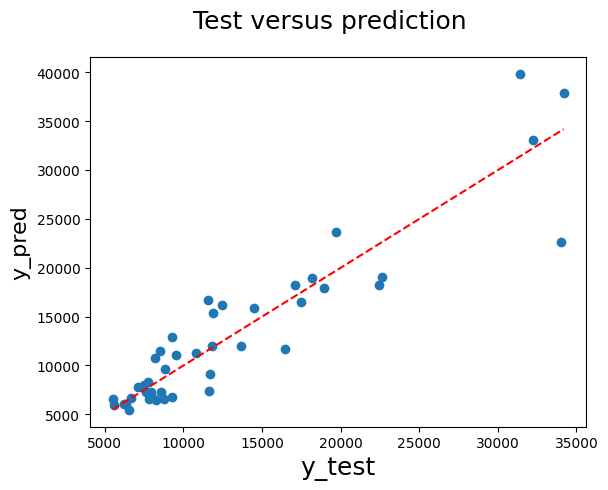

In [223]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ajout de la droite y=x
fig.suptitle('Test versus prediction', fontsize=18)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

# Conclusion : Ce que vous avez appris aujourd'hui ! 🎓🚀

## Analyse Exploratoire des Données (EDA) 📊
- Techniques de visualisation des données avec Seaborn 
- Analyse des corrélations entre variables  
- Distinction entre variables catégorielles et numériques
- Interprétation des graphiques et des tendances 📈
- Utilisation des pairplots et heatmaps pour l'analyse multivariée

## Data Engineering et Préparation des Données 🛠️
- Encodage des variables catégorielles (dummy encoding)
- Normalisation des variables numériques (MinMaxScaler)
- Gestion de la data leak et bonnes pratiques
- Sélection des features pertinentes
- Traitement des corrélations et de la multicolinéarité

## Régression Linéaire 📈
- Compréhension des principes de base
- Analyse des coefficients et leur interprétation
- Évaluation du modèle avec le R²
- Importance de la sélection des variables
- Impact de la multicolinéarité sur le modèle

## Techniques d'Évaluation des Variables 🔍
- Utilisation de la matrice de corrélation
- Application de l'indicateur VIF
- Méthode RFE pour la sélection des variables
- Interprétation des p-values
- Analyse de la significativité des variables

## Bonnes Pratiques en Machine Learning 💡
- Division train/test appropriée
- Prévention de la fuite de données
- Scaling des données sur le bon ensemble
- Validation des hypothèses
- Itération et amélioration du modèle

## Mémo des Ressources 📚

### Documentation Essentielle
- [Documentation Scikit-learn](https://scikit-learn.org/)
- [Documentation Seaborn](https://seaborn.pydata.org/)
- [Documentation Statsmodels](https://www.statsmodels.org/)

### Pour Aller Plus Loin
- [Guide complet sur la régression linéaire](https://scikit-learn.org/stable/modules/linear_model.html)
- [Techniques de feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)
- [Comprendre la multicolinéarité](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

N'oubliez pas : la qualité d'un modèle de machine learning dépend fortement de la qualité de la préparation et de l'analyse des données ! 🎯✨